**Submitted by: Parvathy Menon - 20MIA1105**

In [297]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
!pip install missingno
import missingno 


In [300]:
df = pd.read_csv('Global-Superstore.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,6/19/2014,6/19/2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,6/20/2014,6/24/2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,12/2/2013,12/2/2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,2/18/2012,2/22/2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,S‹o Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [301]:
# To display the summary statistics of the data
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,NaN,25035,1430,1464,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,6/18/2014,11/22/2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,135,130,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN
std,14806.29199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN
25%,12823.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,38467.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN


In [302]:
# To display the first few rows of the data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [303]:
# To check if there is null values
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [304]:
# To display the dimensions of a data
df.shape

(51290, 24)

In [305]:
# To check for basic infomation about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [306]:
# To count the number of unique values in each column of the data
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [307]:
# Check for duplicates in the data
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0



Preview of data with null values:
xxxxxxxxxxxxx
   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
1   26341    IN-2013-77878    2/5/2013    2/7/2013  Second Class    JR-16210   
2   25330    IN-2013-71249  10/17/2013  10/18/2013   First Class    CR-12730   
3   13524  ES-2013-1579342   1/28/2013   1/30/2013   First Class    KM-16375   

      Customer Name      Segment        City            State  ...  \
1     Justin Ritter    Corporate  Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer    Brisbane       Queensland  ...   
3  Katherine Murray  Home Office      Berlin           Berlin  ...   

        Product ID    Category Sub-Category  \
1  FUR-CH-10003950   Furniture       Chairs   
2  TEC-PH-10004664  Technology       Phones   
3  TEC-PH-10004583  Technology       Phones   

                                Product Name     Sales Quantity Discount  \
1  Novimex Executive Leather Armchair, Black  3709.395        9      0.1   
2       

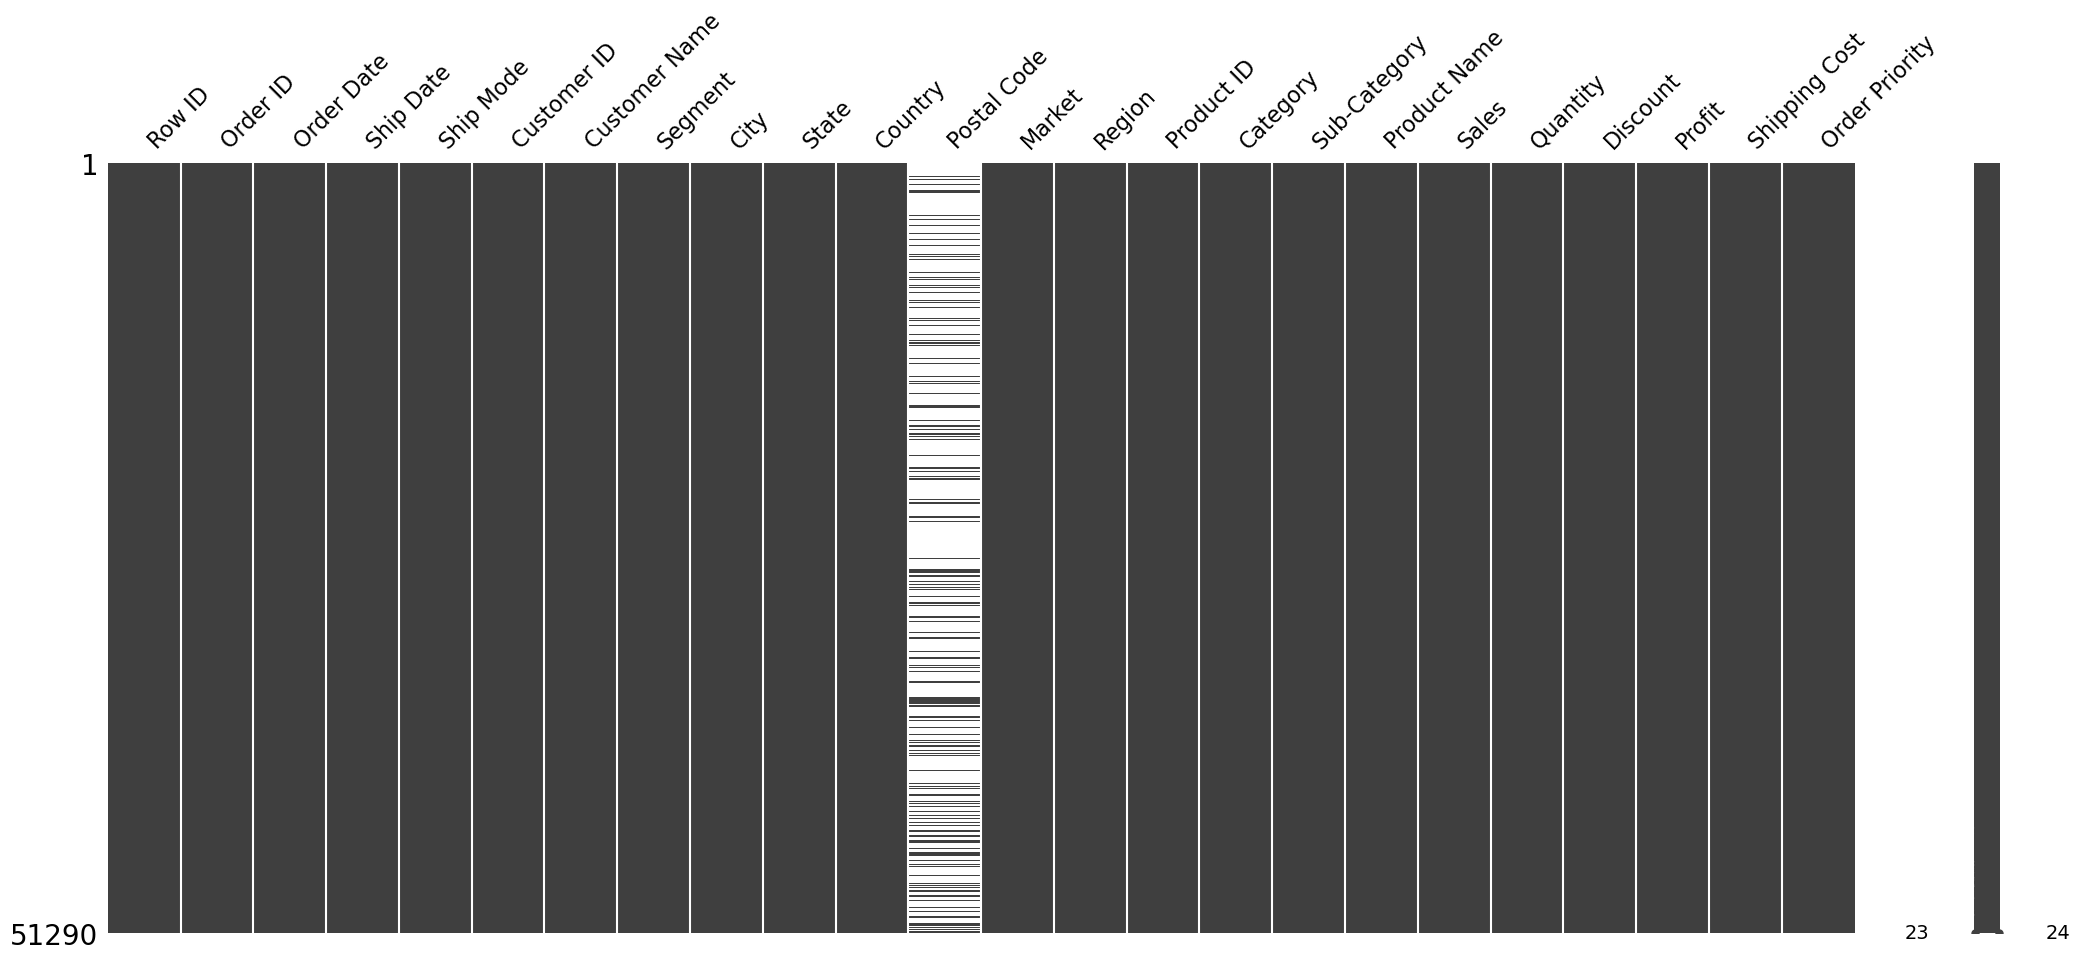

In [308]:
# To check if there exists any null values in the data and if there exists any, it will print preview of rows that contains it and also visualizes the missing data.
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

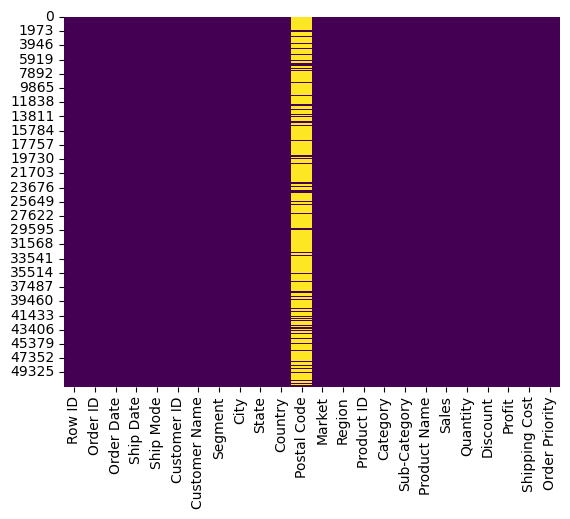

In [310]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [311]:
# Fill missing values for numerical columns with their median
numeric_cols = ['Sales', 'Quantity', 'Discount','Profit','Shipping Cost']
#numeric_cols = df.select_dtypes(include=['number']).columns
#df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for categorical columns with their mode
categorical_cols = df.select_dtypes(include=['object']).columns
#df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

**Since we have no missing values in attributes other than postal code, we are not going to use missing value handling here. In case of a data which has missing values present, use codeblock provided above**.

In [315]:
#To get the summary statistics of data and to display the statistics more clearly
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570


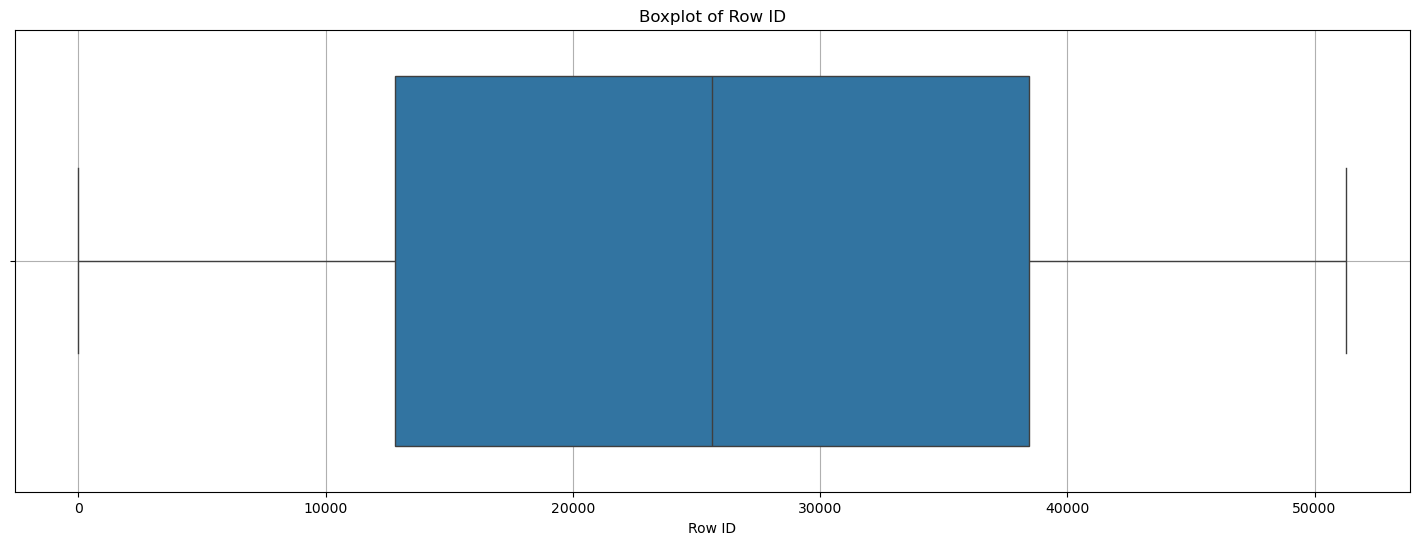

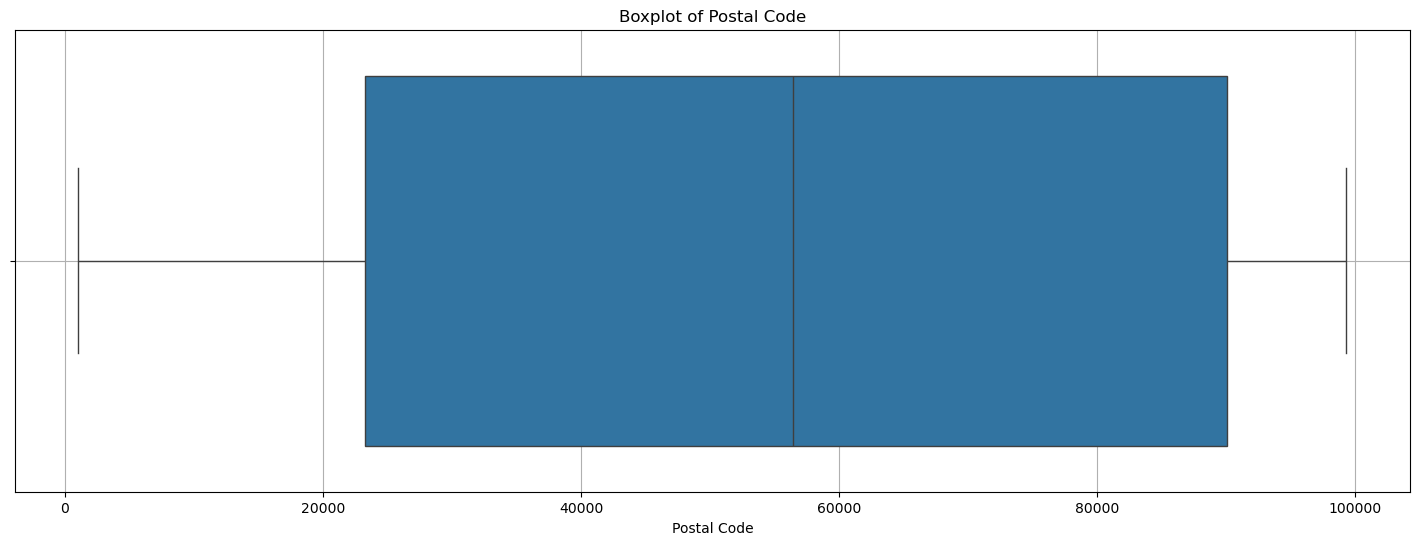

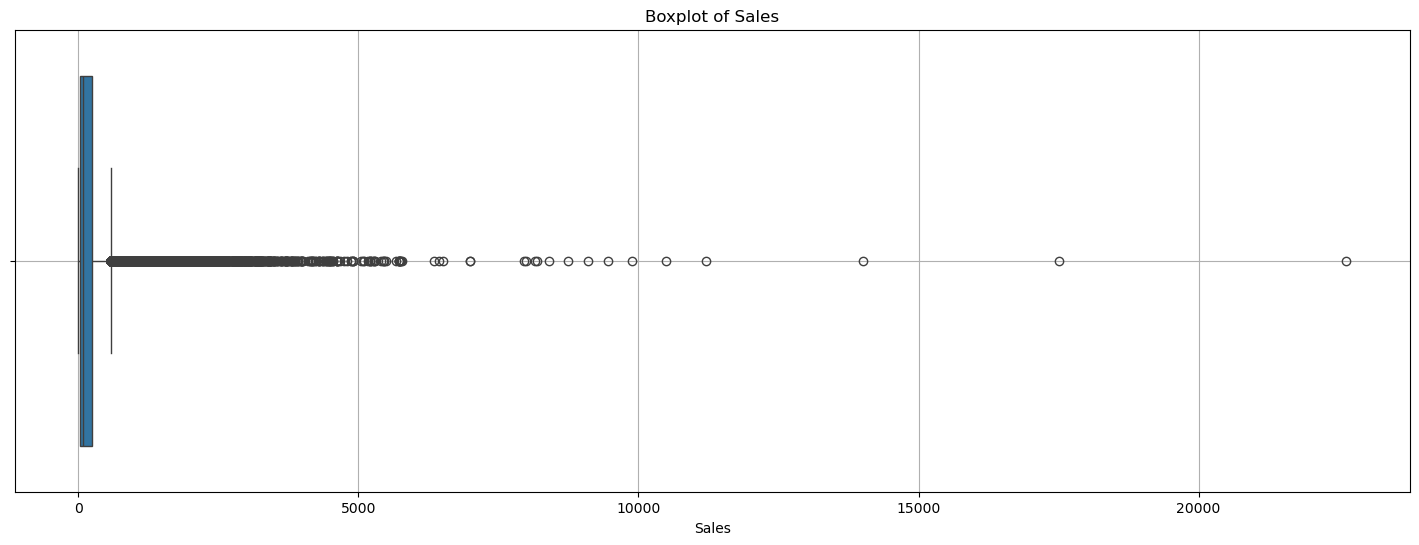

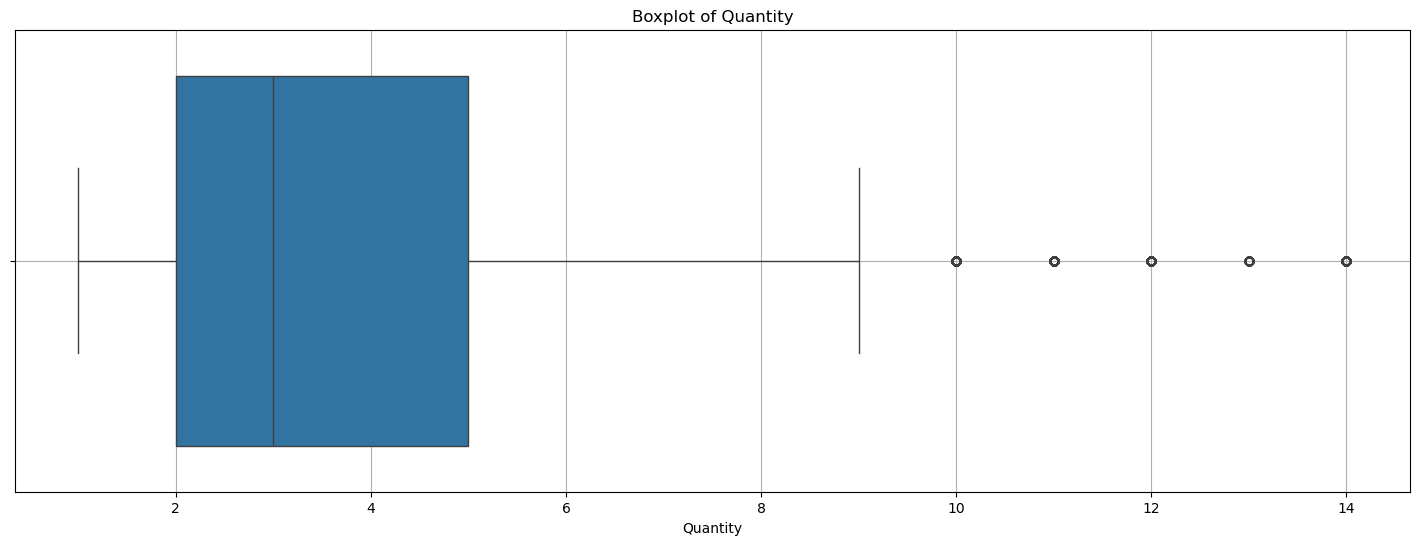

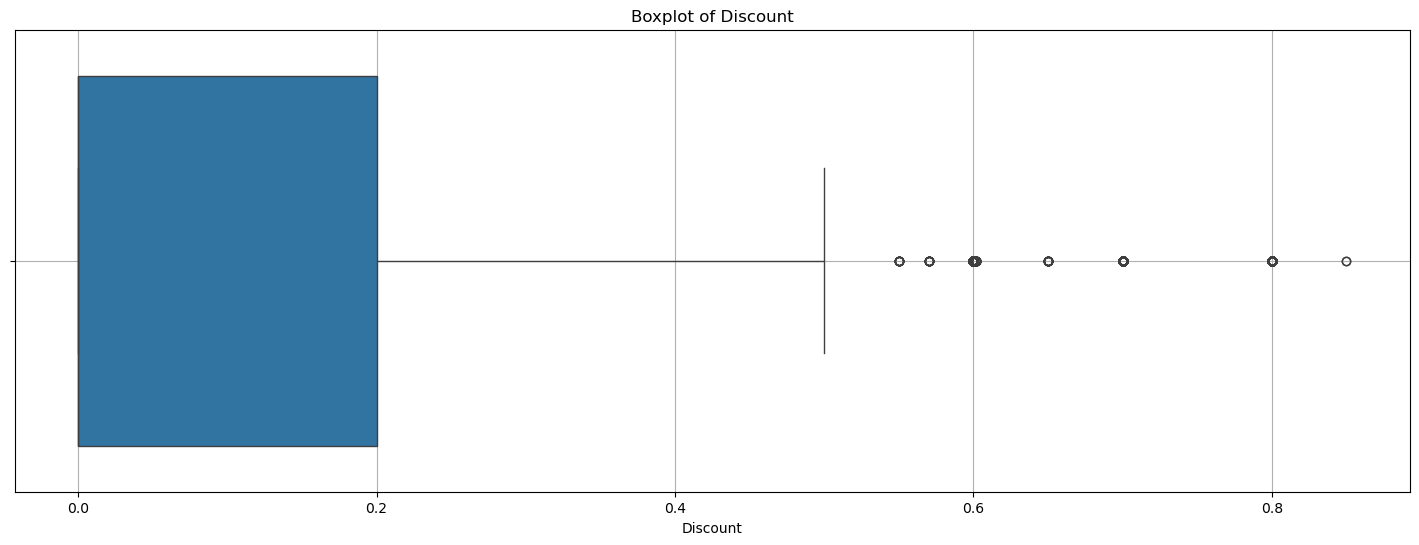

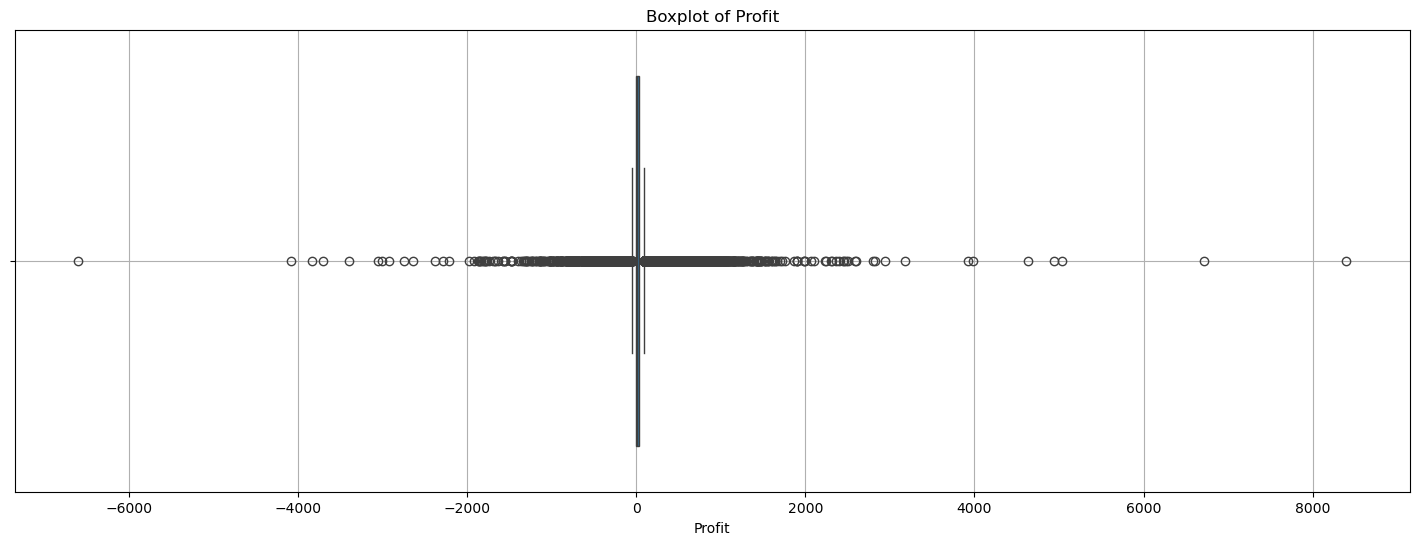

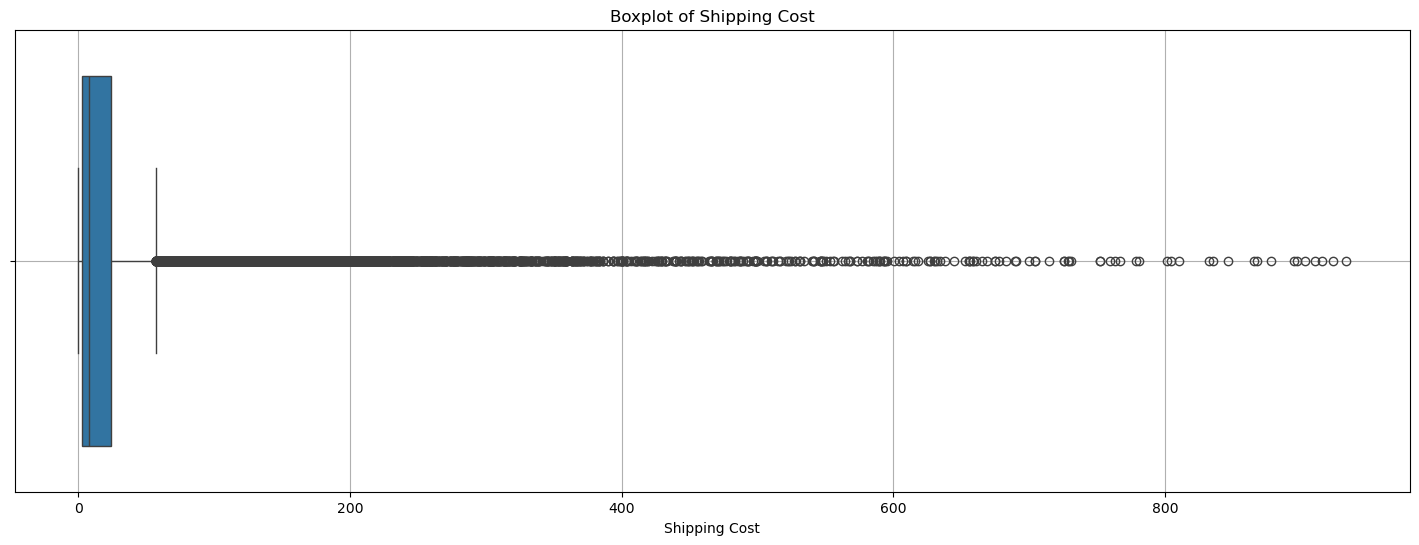

In [320]:
# Boxplot to detect outliers in numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(18, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [324]:
# Check for null values
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [325]:
# To remove outliers from our data by using Z-score and IQR methods to identify and filter out anomalous data points.
from scipy import stats

def remove_outliers(df, numeric_cols, z_score_threshold=3, iqr_factor=1.5):
    """Removes outliers from a DataFrame using Z-score and IQR.

    Args:
        df: The DataFrame containing the data.
        numeric_cols: A list of column names to apply the outlier detection to.
        z_score_threshold: The Z-score threshold for identifying outliers. Default is 3.
        iqr_factor: The IQR factor for identifying outliers. Default is 1.5.

    Returns:
        A DataFrame with outliers removed.
    """
    # Z-score method
    z_scores = np.abs(stats.zscore(df[numeric_cols]))
    is_outlier_zscore = (z_scores >= z_score_threshold).any(axis=1)

    # IQR method
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    is_outlier_iqr = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)

    # Combine both methods using OR logic
    is_outlier = is_outlier_zscore | is_outlier_iqr

    # Remove rows with outliers
    df_clean = df[~is_outlier]

    return df_clean

In [326]:
# To remove outliers from numeric columns our data 
df[numeric_cols] = remove_outliers(df[numeric_cols], numeric_cols)


In [327]:
# To Check null values after remove outliers
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales             14979
Quantity          14979
Discount          14979
Profit            14979
Shipping Cost     14979
Order Priority        0
dtype: int64

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [330]:
# To drop the 'Postal Code' column and to drop any rows with missing values (NaNs).
df =df[df.columns.drop('Postal Code')].dropna()

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36311 entries, 5909 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          36311 non-null  int64  
 1   Order ID        36311 non-null  object 
 2   Order Date      36311 non-null  object 
 3   Ship Date       36311 non-null  object 
 4   Ship Mode       36311 non-null  object 
 5   Customer ID     36311 non-null  object 
 6   Customer Name   36311 non-null  object 
 7   Segment         36311 non-null  object 
 8   City            36311 non-null  object 
 9   State           36311 non-null  object 
 10  Country         36311 non-null  object 
 11  Market          36311 non-null  object 
 12  Region          36311 non-null  object 
 13  Product ID      36311 non-null  object 
 14  Category        36311 non-null  object 
 15  Sub-Category    36311 non-null  object 
 16  Product Name    36311 non-null  object 
 17  Sales           36311 non-null  f

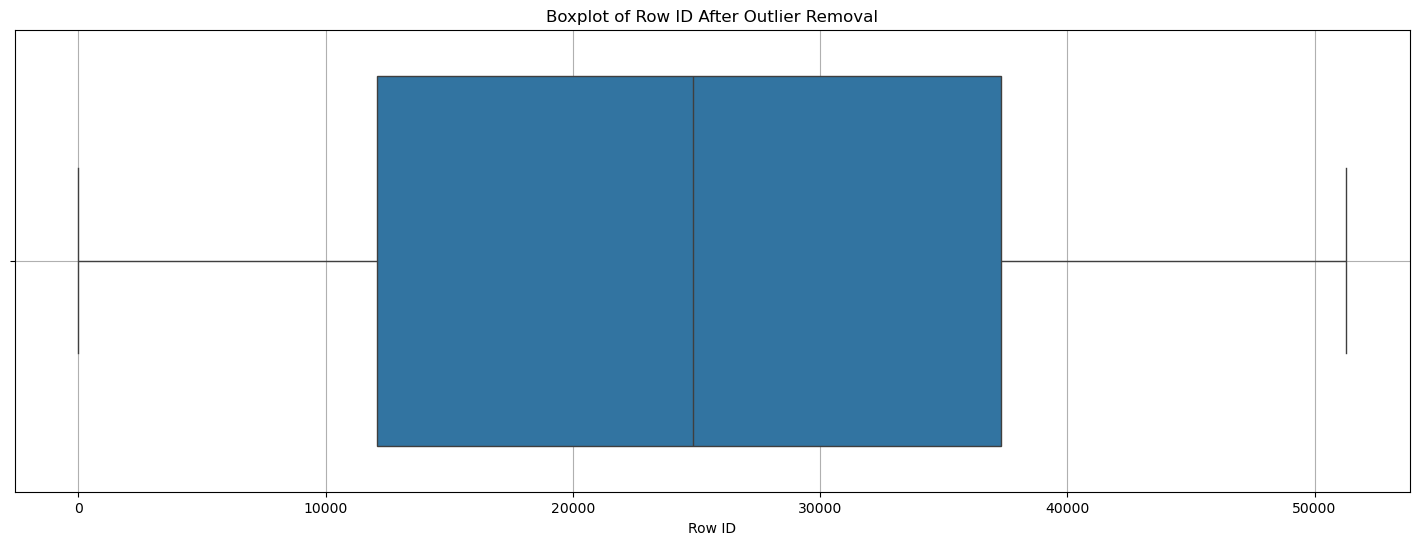

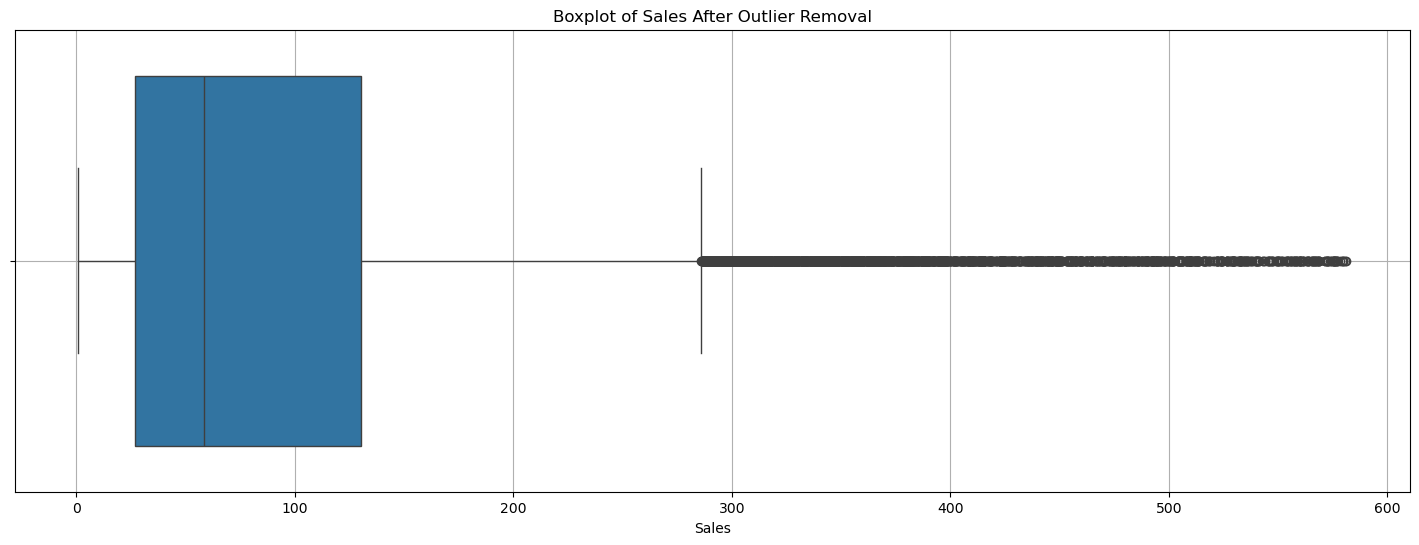

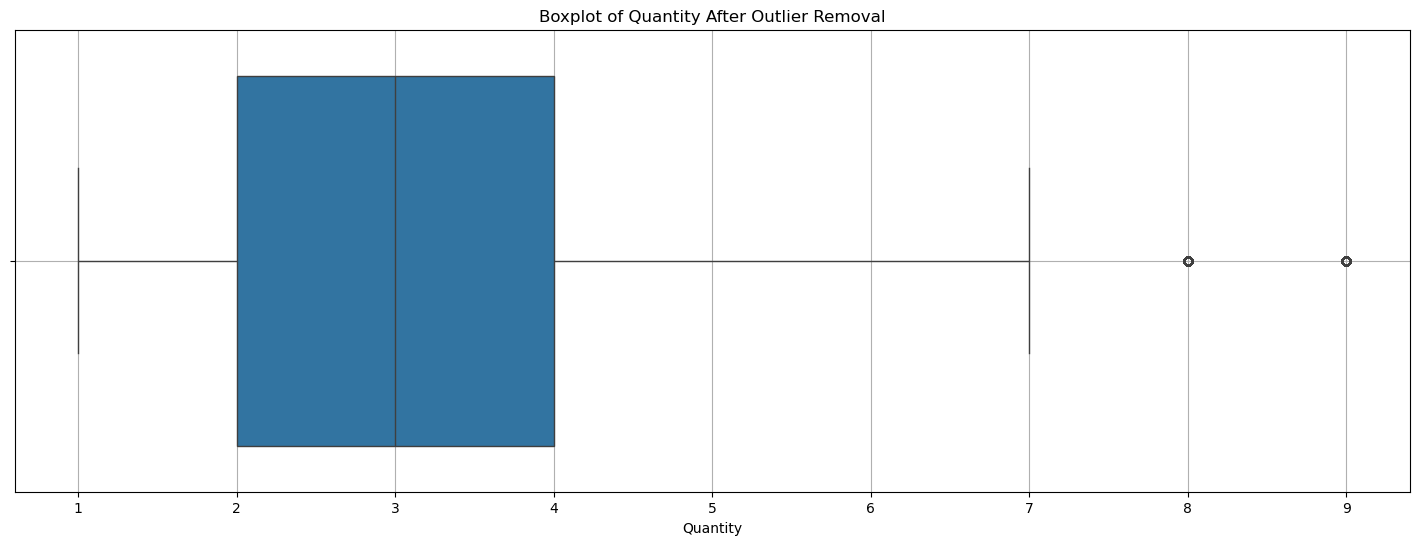

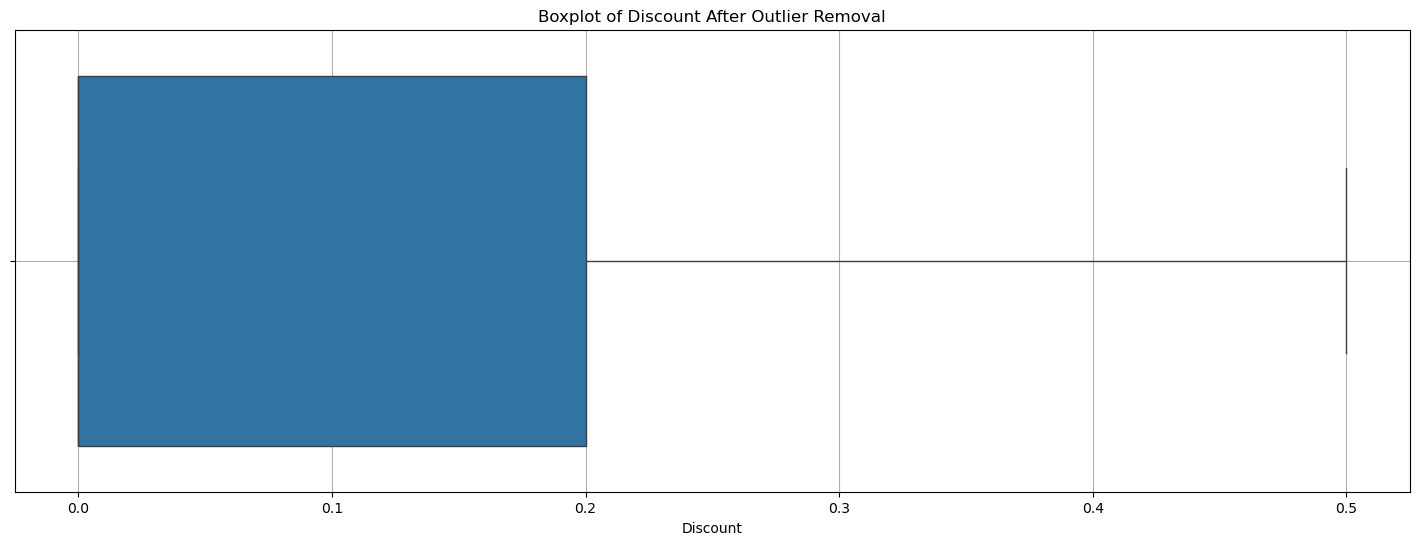

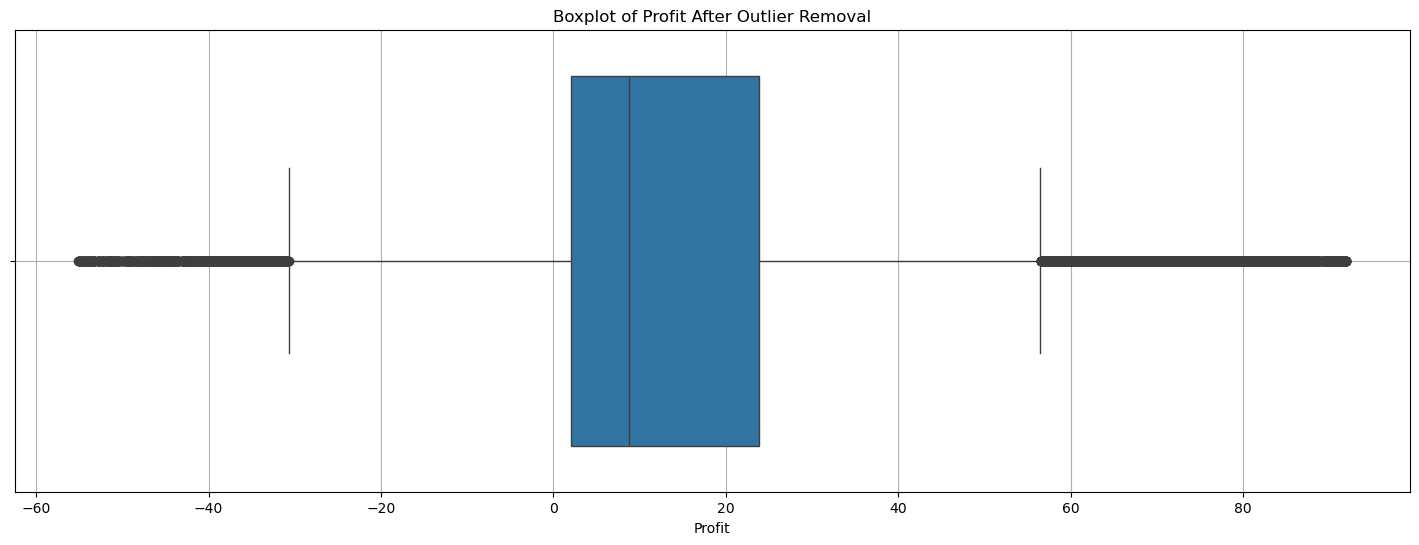

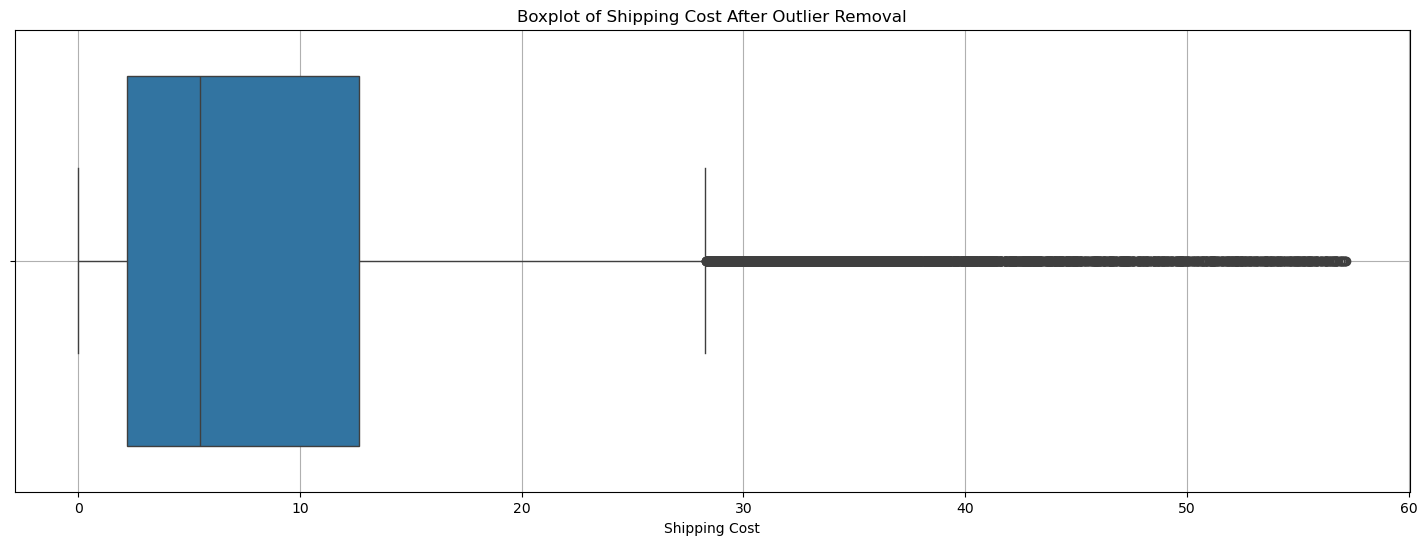

In [332]:
#Boxplots after outlier removal
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(18, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} After Outlier Removal')
    plt.grid(True)
    plt.show()

C:\Users\PARVATHY MENON\AppData\Local\Temp\ipykernel_11080\2958157332.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(x='Sub-Category', y='Profit', data = df, palette='Spectral',linewidth=3)


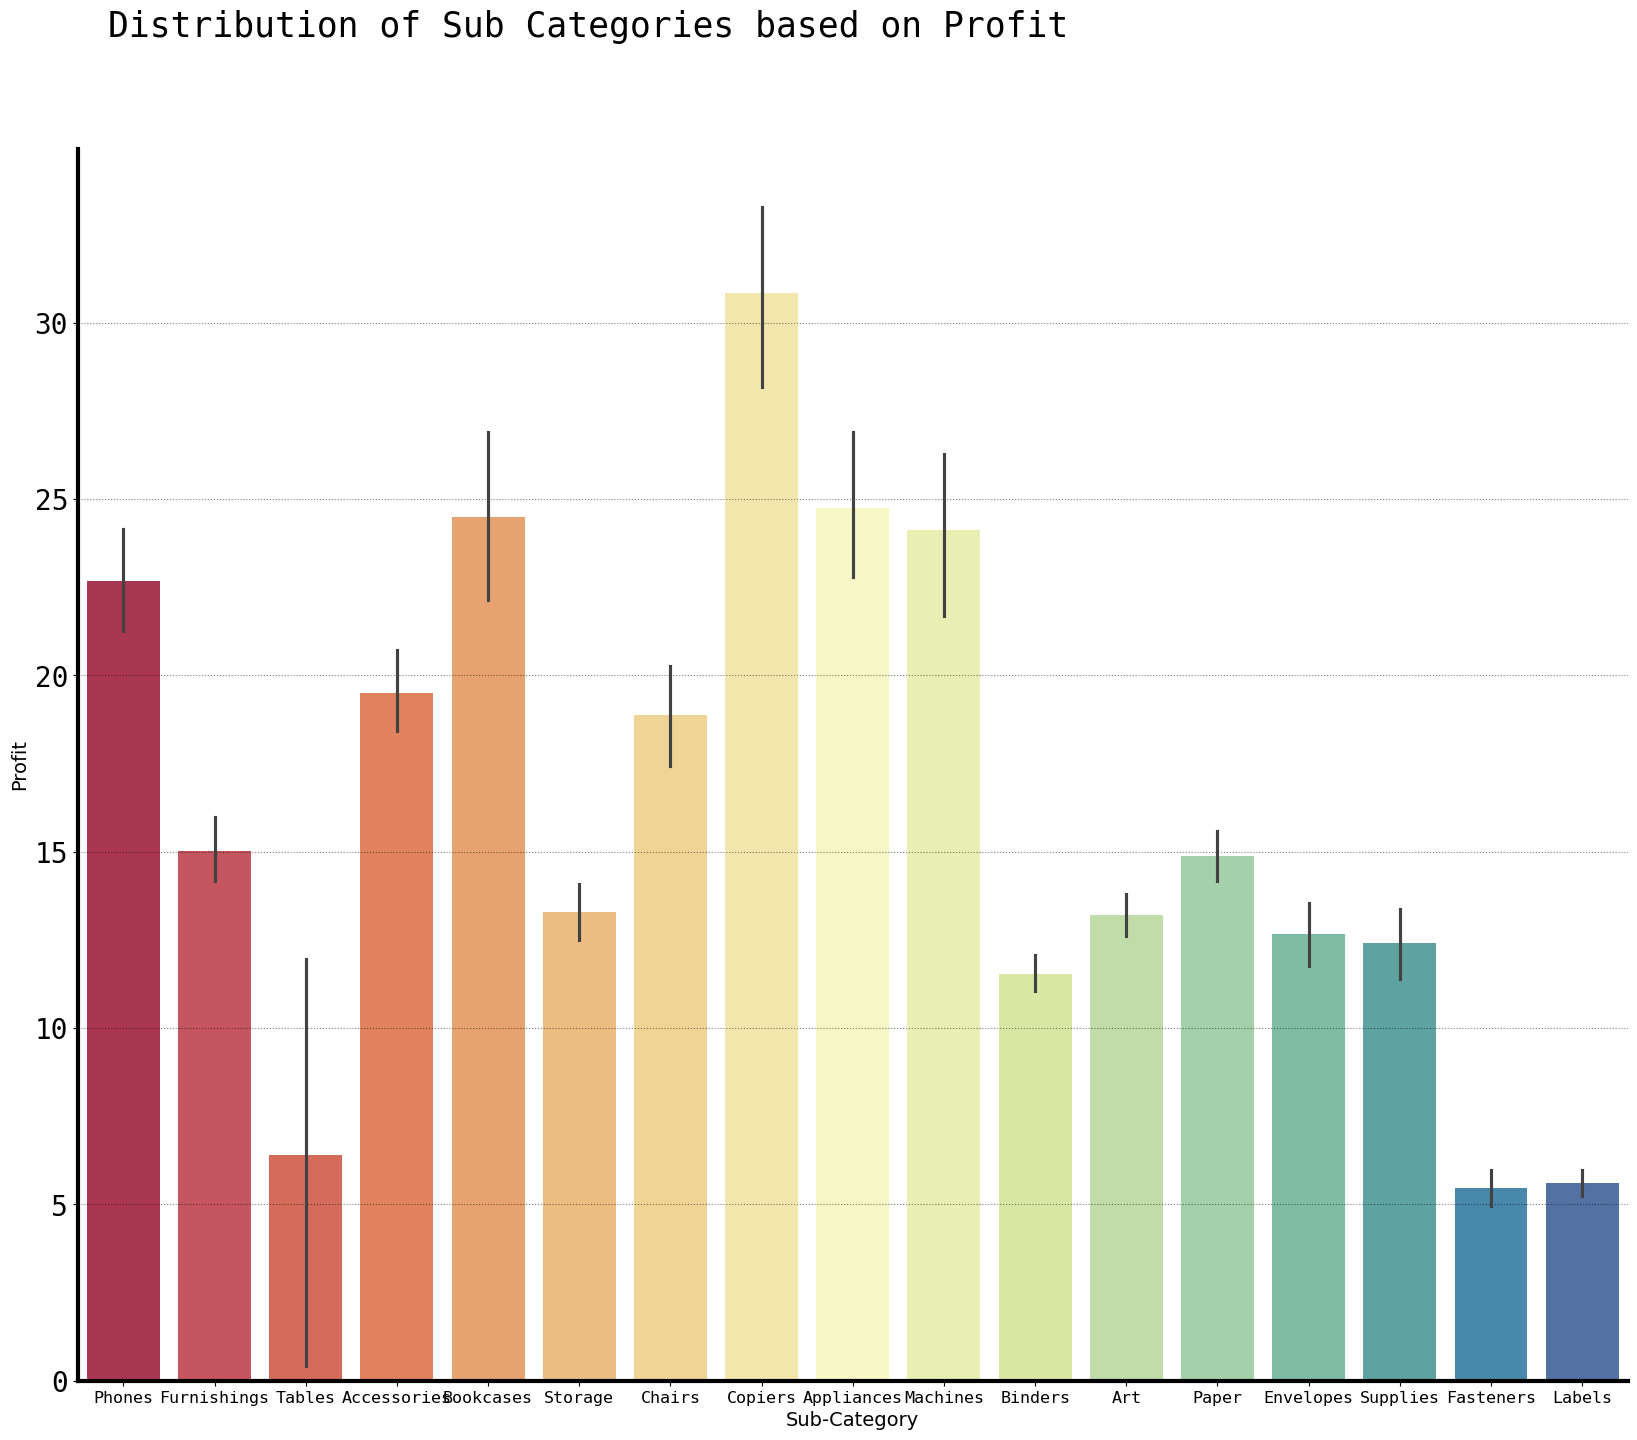

In [333]:
# To give a bar plot to show distribution of profits with different sub-categories in our data.
plt.figure(figsize = (20,16))

a = sns.barplot(x='Sub-Category', y='Profit', data = df, palette='Spectral',linewidth=3)

plt.figtext(x=0.14, y=0.95,
            s='Distribution of Sub Categories based on Profit',
            fontsize=25, fontname='monospace')

plt.xticks(fontsize=12, fontname='monospace')
plt.yticks(fontsize=20, fontname='monospace')
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Profit', fontsize=14)

plt.grid(axis='y', color='black', linestyle = ':', alpha=0.5)

for q in [a]:
    for w in ['bottom', 'left']:
        q.spines[w].set_linewidth(3)
    for w in ['right', 'top']:
        q.spines[w].set_visible(False)

plt.show()

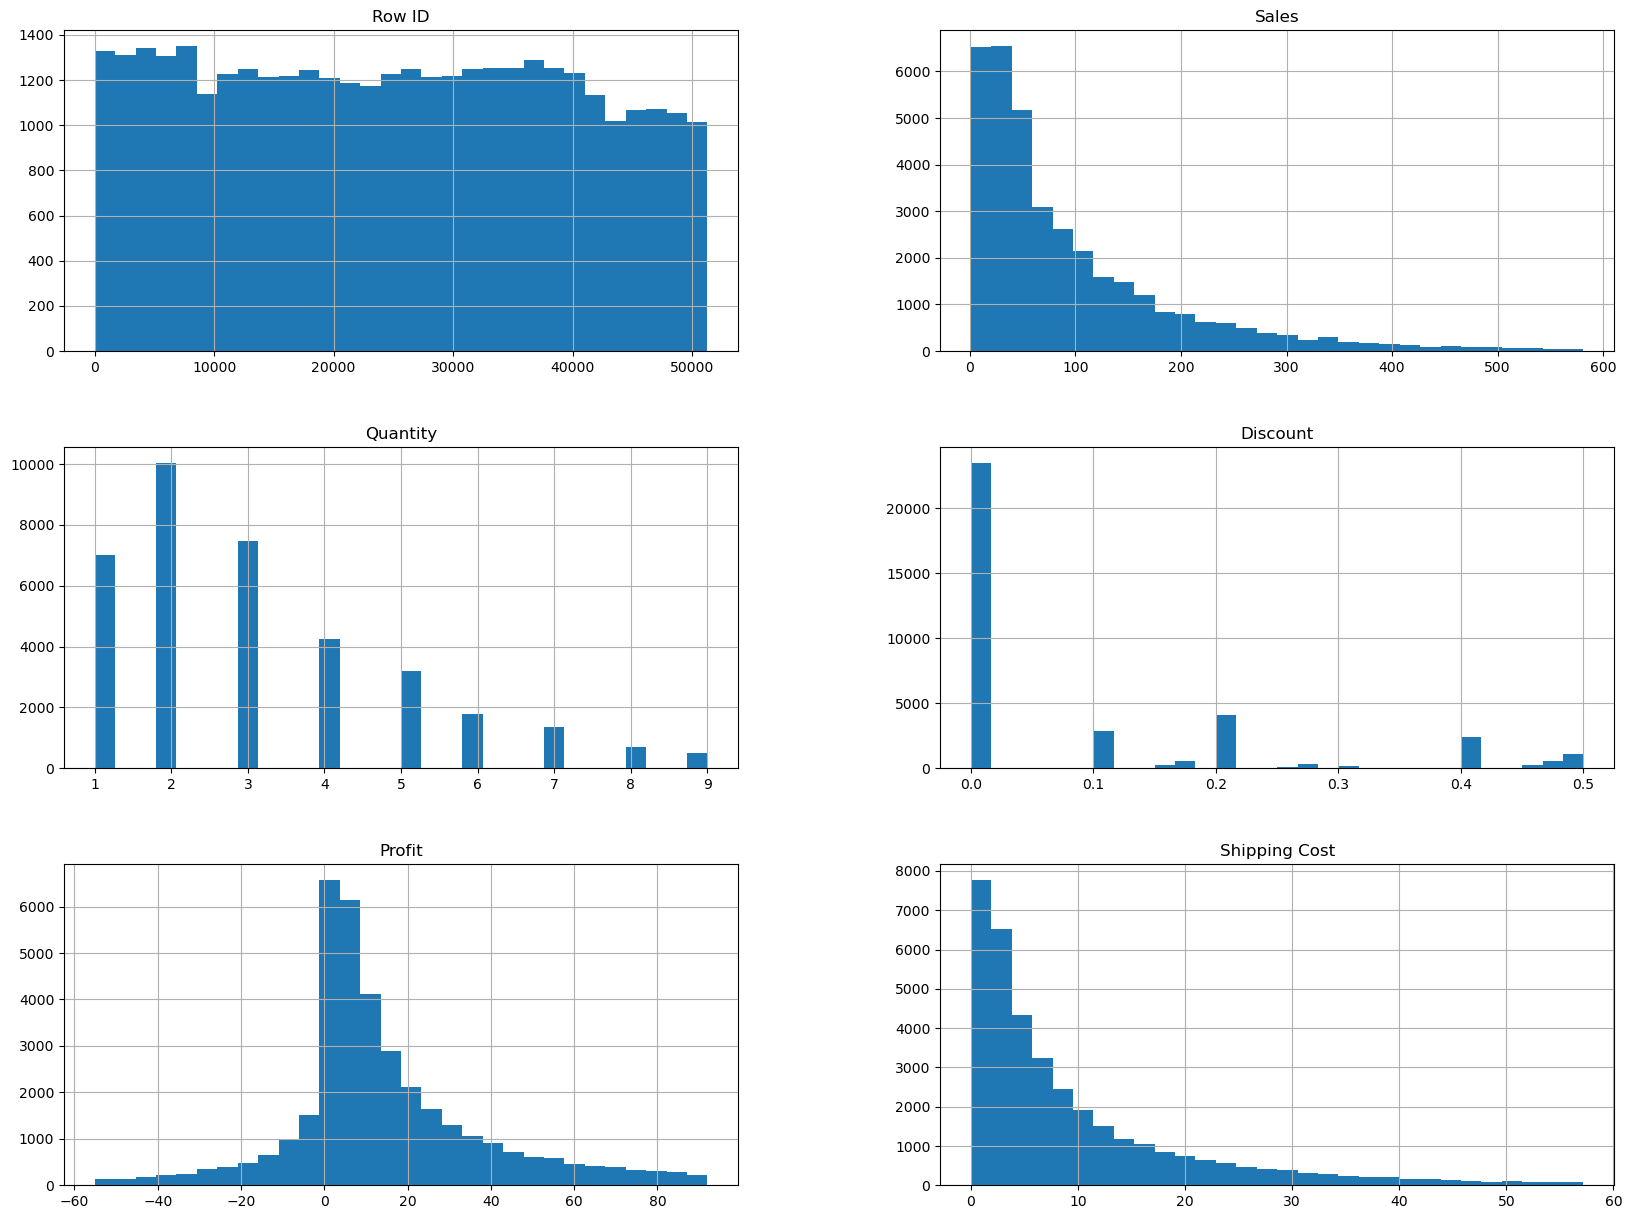

In [334]:
#To draw histograms for numerical columns
df.hist(bins=30, figsize=(20, 15))
plt.show()


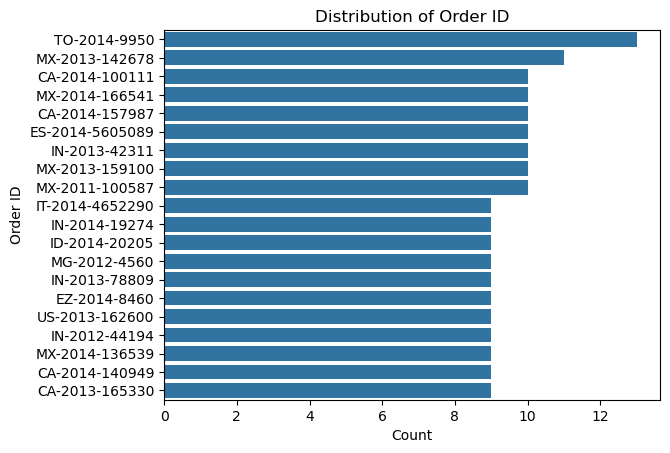

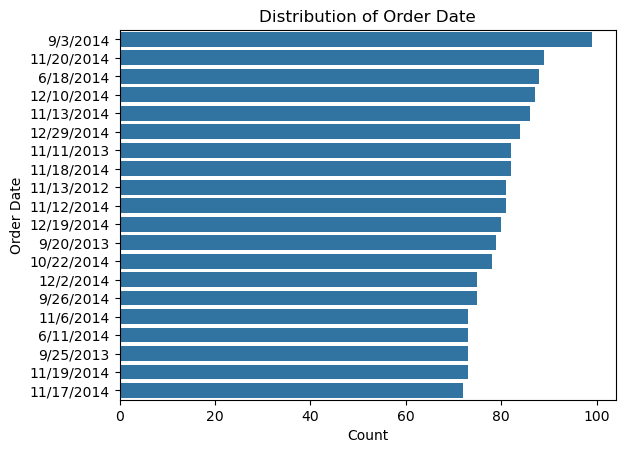

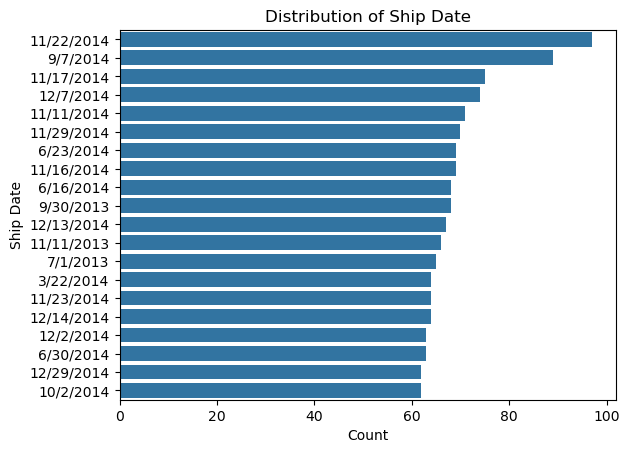

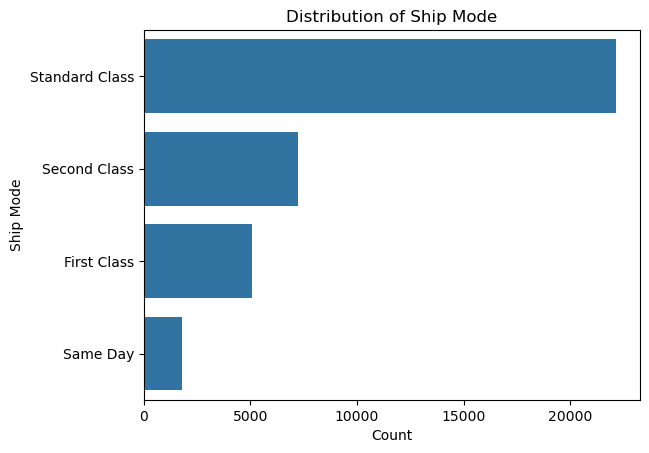

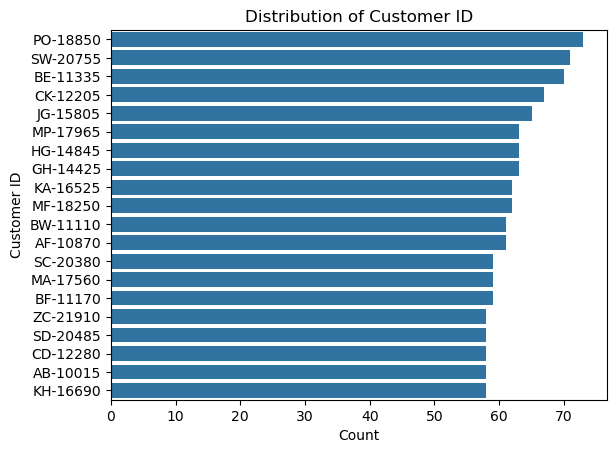

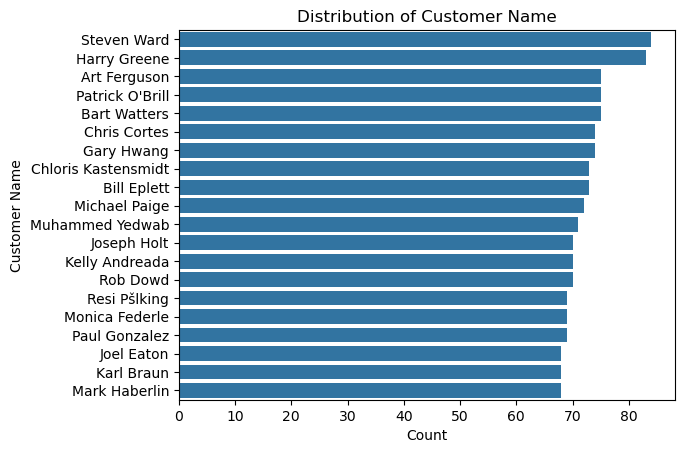

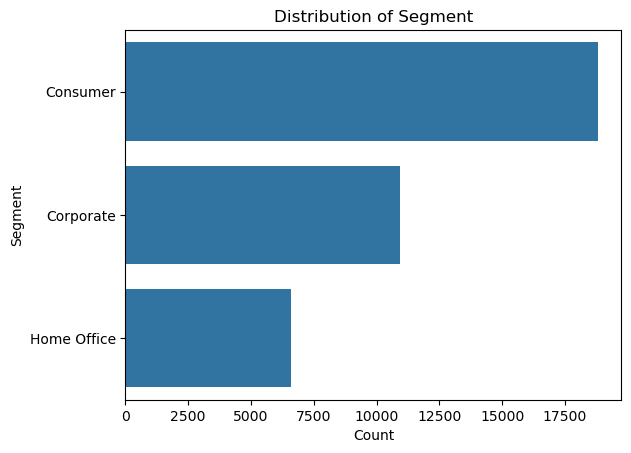

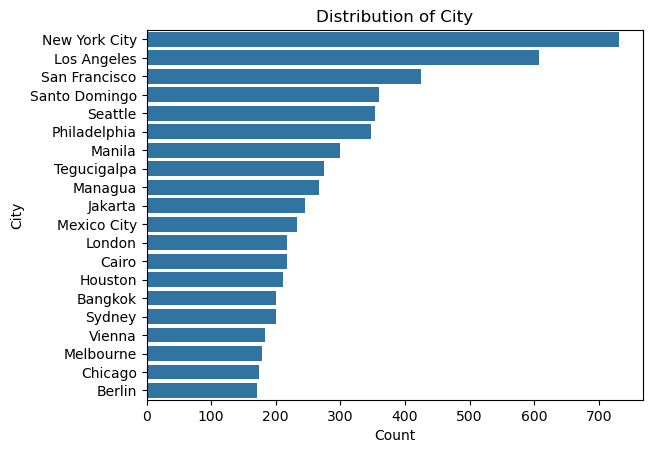

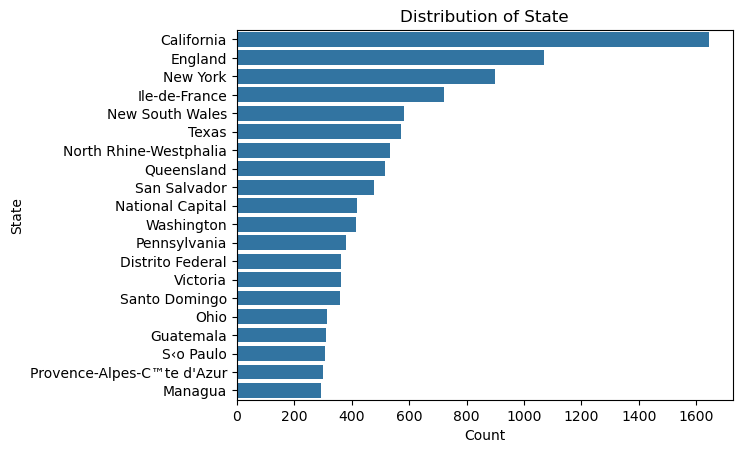

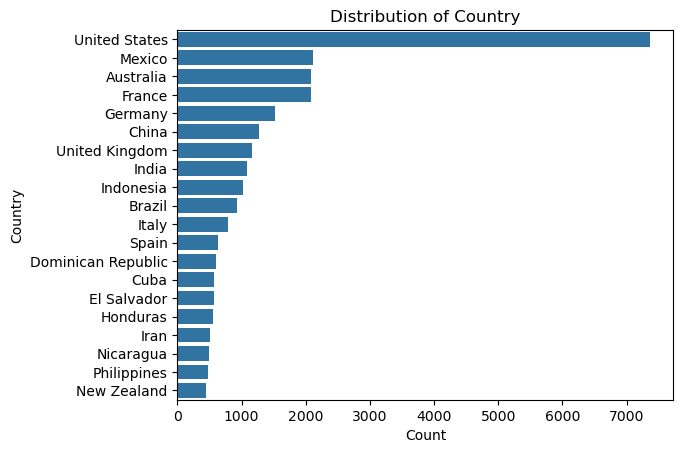

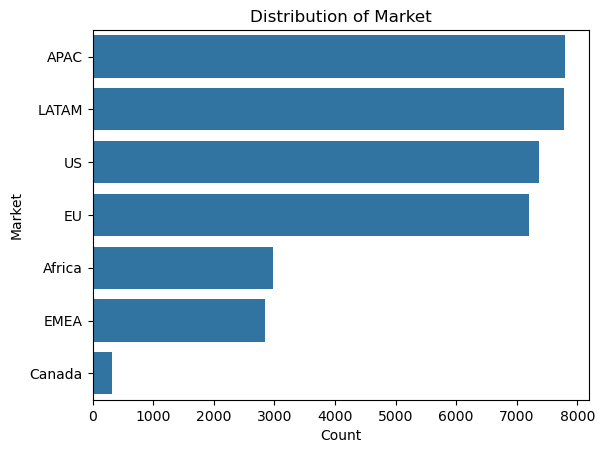

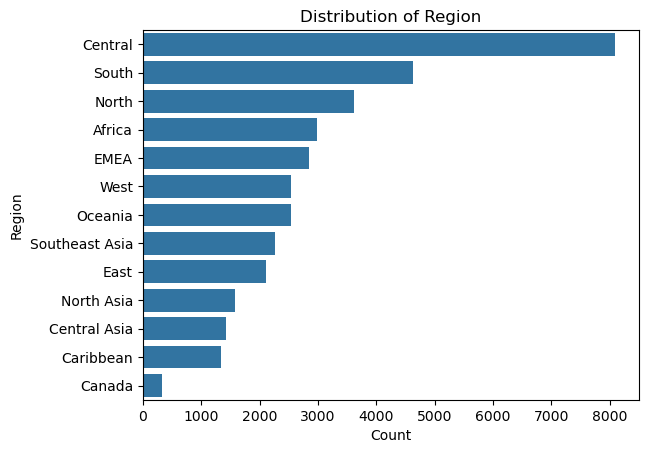

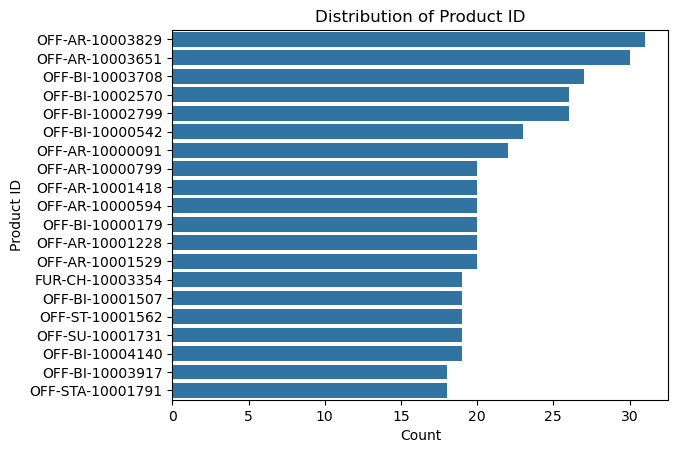

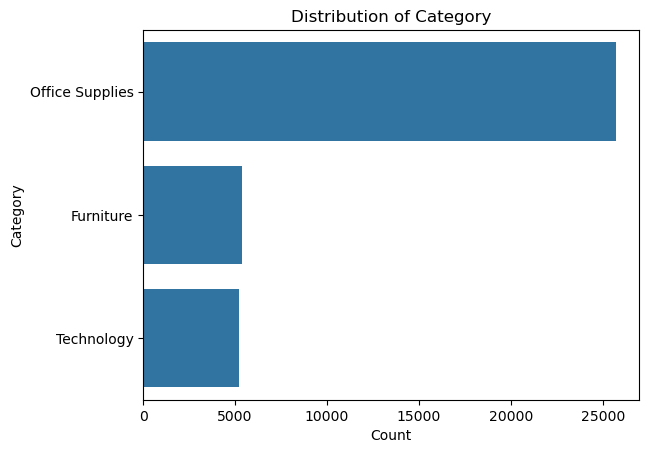

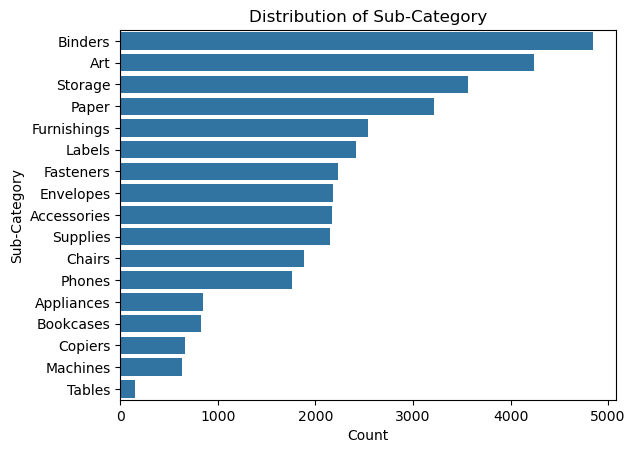

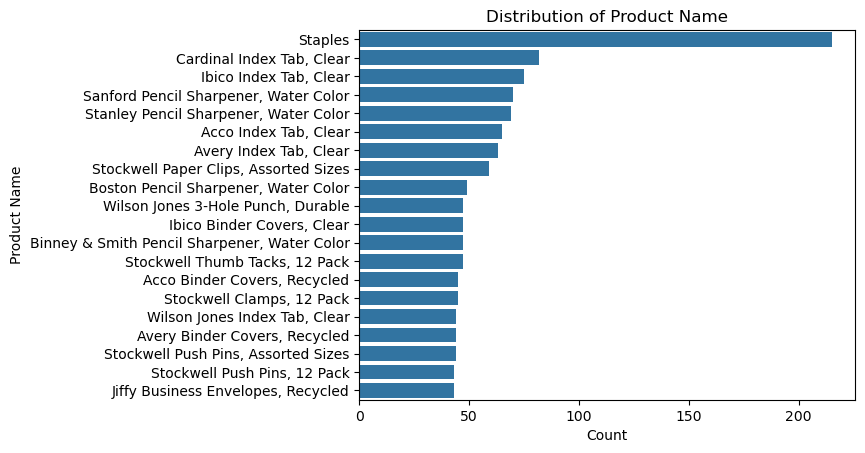

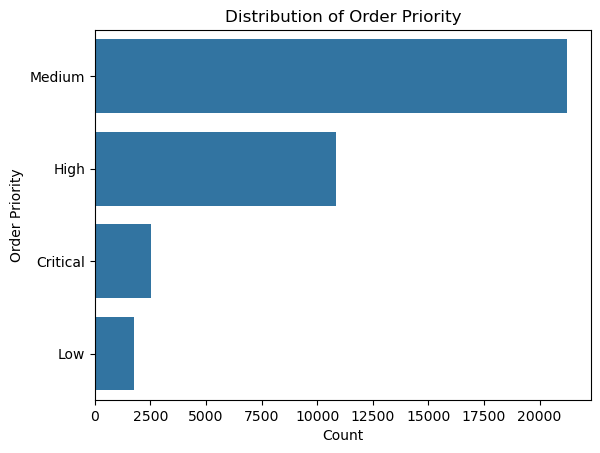

In [335]:
# To draw count plots for all categorical columns in your DataFrame 
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:20])  # Limit to top 20 categories
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


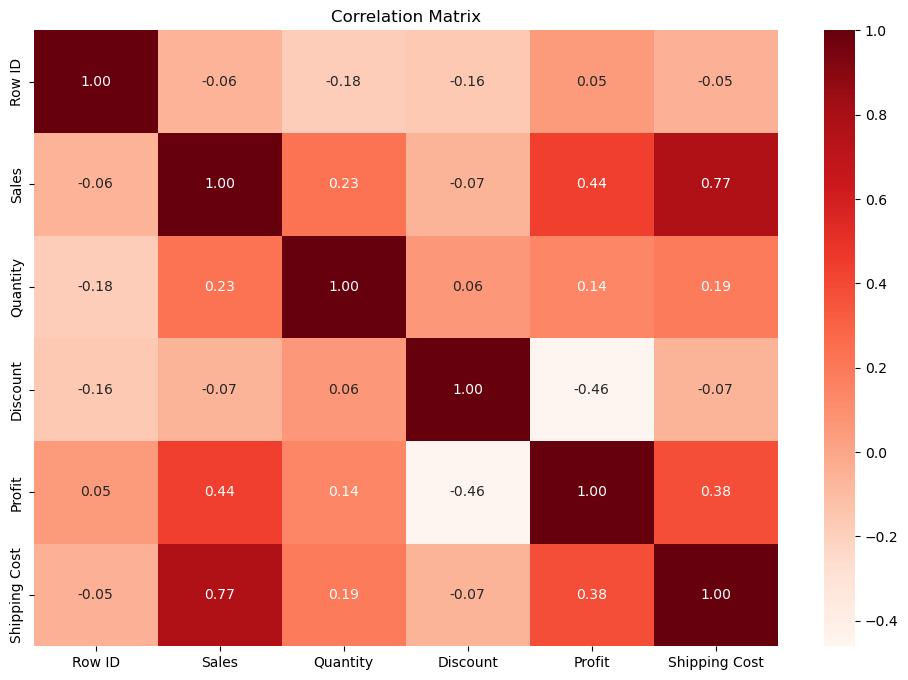

In [336]:
# Computes and visualizes correlation matrix for all numeric columns in our data. 
numeric_df = df.select_dtypes(include=['number'])
# Compute the correlation matrix
corr_matrix = numeric_df.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Strong Positive Correlations is seen for: 

    Sales and Shipping Cost (0.77)
    Sales and Profit (0.44)
    Shipping Cost and Profit (0.38)
Moderate Positive Correlations is for:
  
    Quantity and Sales (0.23)
And Negative Correlationsis seen for:
    
    Discount and Profit (-0.46)

In [341]:
# To find total profit for each category 
profit = df.groupby('Category')['Profit'].sum()
profit

Category
Furniture           94863.92310
Office Supplies    308072.31270
Technology         117791.25908
Name: Profit, dtype: float64

In [342]:
#Create a new Dataframe loss which contains only rows from df where the 'Profit' column has negative values(indicating a loss).
loss = df[df['Profit'] < 0]
loss

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
5922,30952,ID-2014-85529,5/8/2014,5/12/2014,Standard Class,AG-10300,Aleksandra Gannaway,Corporate,Auckland,Auckland,...,FUR-BO-10001872,Furniture,Bookcases,"Bush Stackable Bookrack, Pine",449.496,6.0,0.40,-30.0240,57.05,High
5940,12345,IT-2013-1143457,4/9/2013,4/15/2013,Standard Class,HM-14980,Henry MacAllister,Consumer,Paris,Ile-de-France,...,TEC-PH-10003492,Technology,Phones,"Cisco Audio Dock, Full Size",467.568,3.0,0.15,-0.0720,56.90,Low
5968,18804,IT-2014-5800736,6/11/2014,6/17/2014,Standard Class,HL-15040,Hunter Lopez,Consumer,Oviedo,Asturias,...,OFF-ST-10001758,Office Supplies,Storage,"Rogers Lockers, Blue",380.916,2.0,0.10,-12.7440,56.63,Low
6005,17157,ES-2013-5266365,9/4/2013,9/7/2013,Second Class,HG-14965,Henry Goldwyn,Corporate,Niort,Poitou-Charentes,...,OFF-AP-10000005,Office Supplies,Appliances,"KitchenAid Microwave, Red",558.576,2.0,0.10,-18.6240,56.26,Medium
6023,39226,CA-2014-167549,7/26/2014,7/28/2014,First Class,EM-14200,Evan Minnotte,Home Office,Dallas,Texas,...,FUR-TA-10004767,Furniture,Tables,Safco Drafting Table,298.116,6.0,0.30,-4.2588,56.12,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51232,3569,US-2013-148705,12/16/2013,12/18/2013,Second Class,GK-14620,Grace Kelly,Corporate,La Vega,La Vega,...,FUR-FU-10002698,Furniture,Furnishings,"Deflect-O Clock, Erganomic",48.930,3.0,0.50,-2.9700,0.05,Medium
51234,22652,IN-2014-46686,11/12/2014,11/16/2014,Standard Class,EJ-13720,Ed Jacobs,Consumer,Busan,Busan,...,OFF-SU-10001877,Office Supplies,Supplies,"Elite Ruler, High Speed",6.900,1.0,0.50,-0.8400,0.05,Medium
51235,24004,IN-2011-43298,11/3/2011,11/5/2011,Second Class,MV-17485,Mark Van Huff,Consumer,Peshawar,Khyber Pakhtunkhwa,...,OFF-LA-10000436,Office Supplies,Labels,"Novimex File Folder Labels, 5000 Label Set",17.280,4.0,0.50,-13.9200,0.05,Medium
51253,29192,ID-2014-66174,7/8/2014,7/13/2014,Standard Class,JE-15610,Jim Epp,Corporate,Lahore,Punjab,...,OFF-PA-10001653,Office Supplies,Paper,"Green Bar Memo Slips, Multicolor",18.360,2.0,0.50,-13.2600,0.04,Medium


C:\Users\PARVATHY MENON\AppData\Local\Temp\ipykernel_11080\123768846.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(x='Sub-Category', y='Profit', data = df, palette='Spectral',linewidth=3)


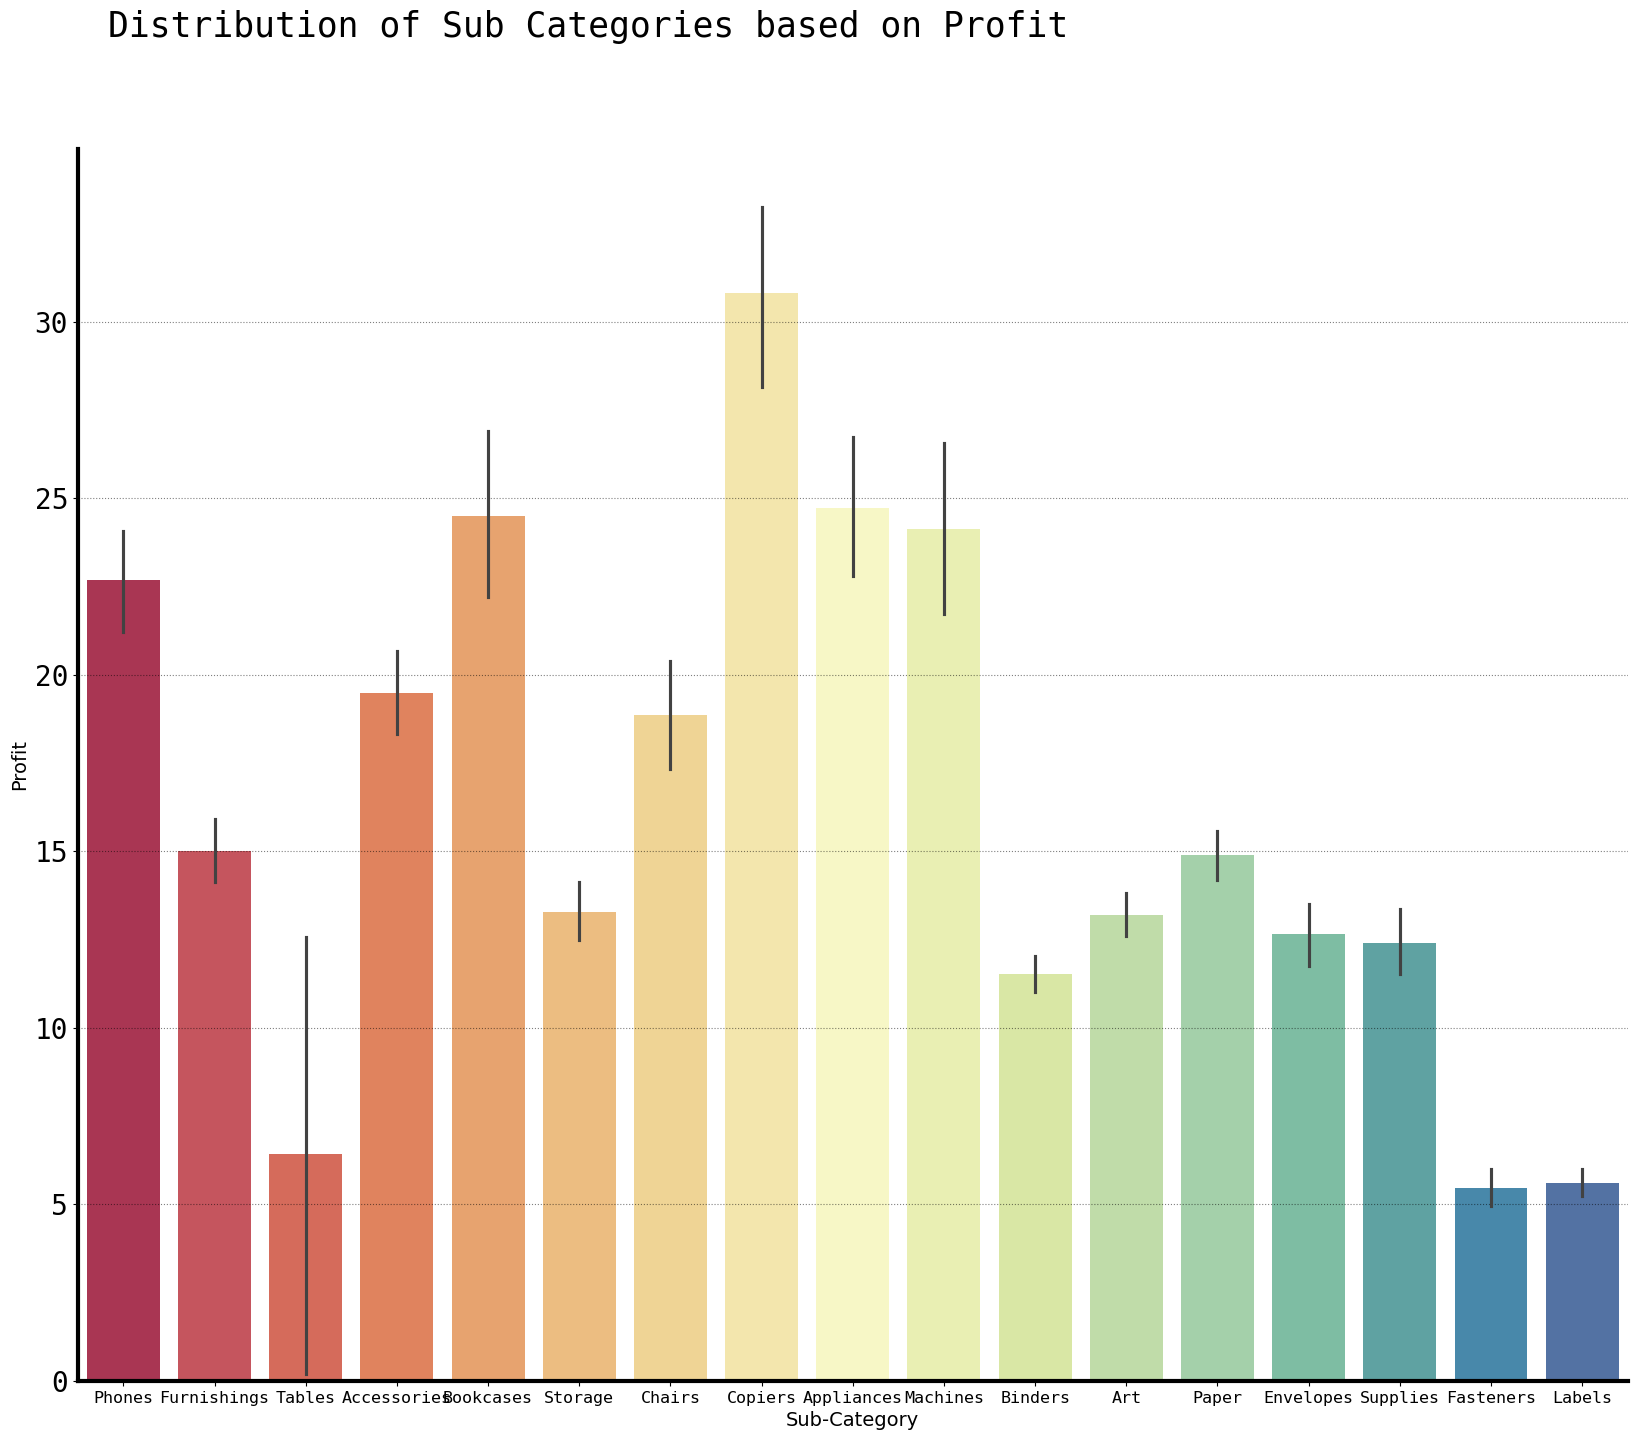

In [343]:
# To creates bar plot of distribution of profit with different sub-categories
plt.figure(figsize = (20,16))

a = sns.barplot(x='Sub-Category', y='Profit', data = df, palette='Spectral',linewidth=3)

plt.figtext(x=0.14, y=0.95,
            s='Distribution of Sub Categories based on Profit',
            fontsize=25, fontname='monospace')

plt.xticks(fontsize=12, fontname='monospace')
plt.yticks(fontsize=20, fontname='monospace')
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Profit', fontsize=14)

plt.grid(axis='y', color='black', linestyle = ':', alpha=0.5)

for q in [a]:
    for w in ['bottom', 'left']:
        q.spines[w].set_linewidth(3)
    for w in ['right', 'top']:
        q.spines[w].set_visible(False)

plt.show()

In [344]:
# To print cities with highest sales and sorting in descending order and display top 20
print("Cities with highest Sales are= ")
print((df.sort_values("Sales",ascending=False).head(20))['City'])

Cities with highest Sales are= 
8673            Kanpur
12659         Mandurah
8702     San Francisco
8316         Fairfield
6309       Los Angeles
9429       Mexico City
6275      Christchurch
7488           Rostock
7693      Chincha Alta
10133           Manila
16033    San Francisco
12421            Delhi
7619            London
7568           Forster
9393              Unna
6107           Delgado
9785       Mexico City
7827           Moulins
13037            Surat
8866          Jiutepec
Name: City, dtype: object


C:\Users\PARVATHY MENON\AppData\Local\Temp\ipykernel_11080\3236778697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="City" , data= df.sort_values("Sales",ascending=False).head(20),palette='Spectral',linewidth=3)


<Axes: xlabel='Sales', ylabel='City'>

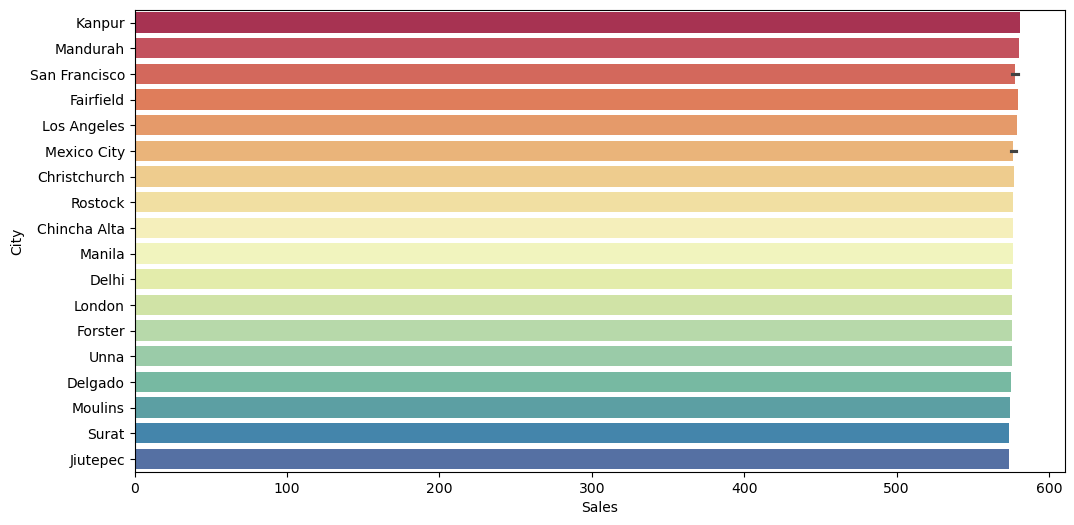

In [345]:
# To create bar plot showing cities with highest sales
plt.subplots(figsize=(12,6))
sns.barplot(x="Sales", y="City" , data= df.sort_values("Sales",ascending=False).head(20),palette='Spectral',linewidth=3)

In [346]:
# To print cities with lowest sales
print("Cities with lowest Sales are= ")
print((df.sort_values("Sales",ascending=True).head(20))['City'])

Cities with lowest Sales are= 
50827    San Francisco
51110           Auburn
50744          Houston
51147            Tampa
51270          Seattle
51033          Phoenix
50437         San Jose
51080           Toledo
51057     Philadelphia
51143          Memphis
50355           Dallas
50791        Baltimore
49629             Troy
50186    New York City
50739      Brownsville
51067       Burlington
51061          Roswell
48897          Madison
50665    Santa Barbara
51085          Houston
Name: City, dtype: object


C:\Users\PARVATHY MENON\AppData\Local\Temp\ipykernel_11080\386077520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="City" , data= df.sort_values("Sales",ascending=True).head(20),palette='Spectral',linewidth=3)


<Axes: xlabel='Sales', ylabel='City'>

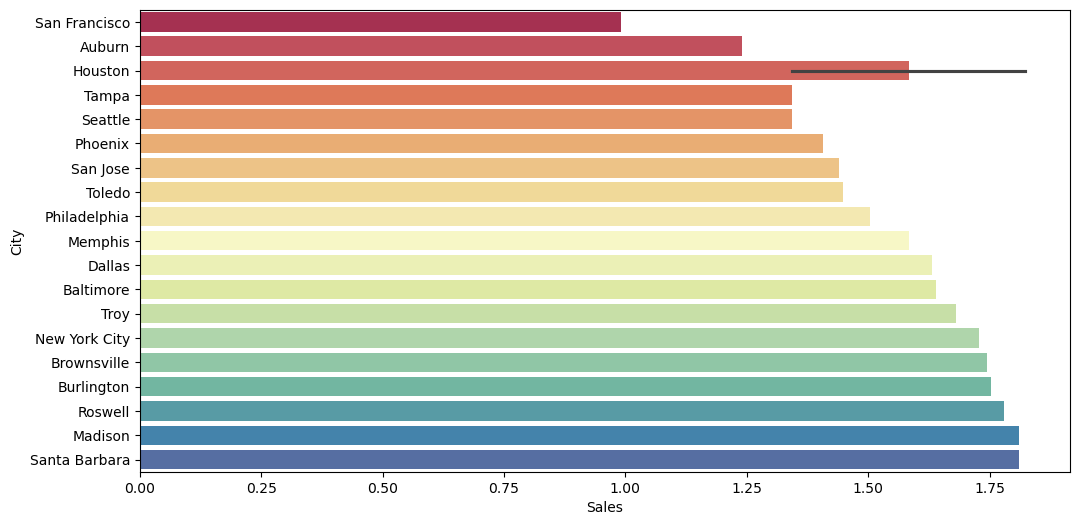

In [352]:
#To create bar plot showing cities with lowest sales
plt.subplots(figsize=(12,6))
sns.barplot(x="Sales", y="City" , data= df.sort_values("Sales",ascending=True).head(20),palette='Spectral',linewidth=3)

In [357]:
# To print products generating highest profit
print("Products generating highest profit = ")
print((df.sort_values("Profit",ascending=False).head(20))['Product Name'])

Products generating highest profit = 
9056     Razer Tiamat Over Ear 7.1 Surround Sound PC Ga...
7927     Computer Printout Paper with Letter-Trim Fine ...
6520                                            Xerox 1911
15542                                           Xerox 1917
17531                   Tops White Computer Printout Paper
11435                                           Xerox 1917
7915                       Hewlett Fax and Copier, Digital
12973                      Hewlett Fax and Copier, Digital
6060                       Hewlett Fax and Copier, Digital
17136                          Enermax Mouse, Programmable
13368                          Enermax Mouse, Programmable
16962                                 Panasonic Phone, Red
9019                      LogitechÊGaming G510s - Keyboard
9923                      LogitechÊGaming G510s - Keyboard
6763                 Dana Halogen Swing-Arm Architect Lamp
20494                Dana Halogen Swing-Arm Architect Lamp
16987             

C:\Users\PARVATHY MENON\AppData\Local\Temp\ipykernel_11080\3533477376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="Product Name" , data= df.sort_values("Profit",ascending=False).head(20),palette='Spectral',linewidth=3)


<Axes: xlabel='Profit', ylabel='Product Name'>

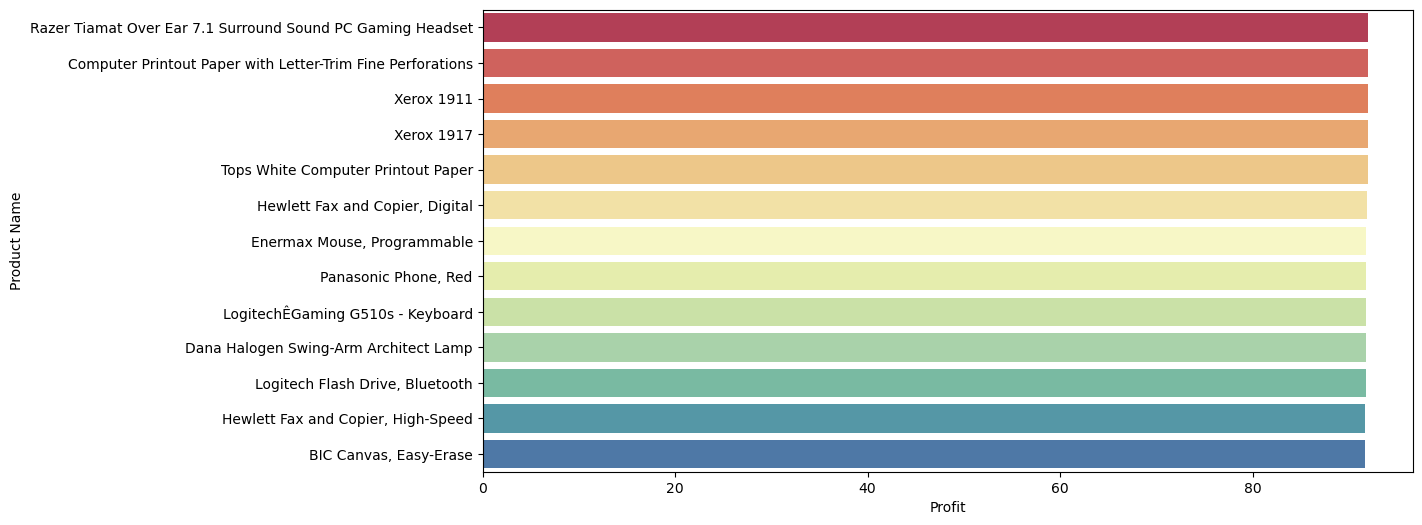

In [358]:
plt.subplots(figsize=(12,6))
sns.barplot(x="Profit", y="Product Name" , data= df.sort_values("Profit",ascending=False).head(20),palette='Spectral',linewidth=3)

In [359]:
print("Products generating lowest profit = ")
print((df.sort_values("Profit",ascending=True).head(20))['Product Name'])

Products generating lowest profit = 
20693             Stanley Pencil Sharpener, Water Color
15429                       Novimex Swivel Stool, Black
19904                       Novimex Swivel Stool, Black
35723                Stiletto Letter Opener, High Speed
13937                             Tenex Frame, Duo Pack
22751                             Tenex Frame, Duo Pack
24990                                Tenex Frame, Black
7985                   Fellowes File Cart, Single Width
20726                            Rogers File Cart, Blue
19258    Carina Media Storage Towers in Natural & Black
34494                                  Rogers Box, Blue
10360                     Logitech Router, Programmable
6685                            Nokia Headset, Cordless
20191               Hon Steel Folding Chair, Set of Two
35136                          Accos Paper Clips, Metal
7212                  High-Back Leather Manager's Chair
13644                 High-Back Leather Manager's Chair
12643      

C:\Users\PARVATHY MENON\AppData\Local\Temp\ipykernel_11080\112663604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="Product Name" , data= df.sort_values("Profit",ascending=True).head(20),palette='Spectral',linewidth=3)


<Axes: xlabel='Profit', ylabel='Product Name'>

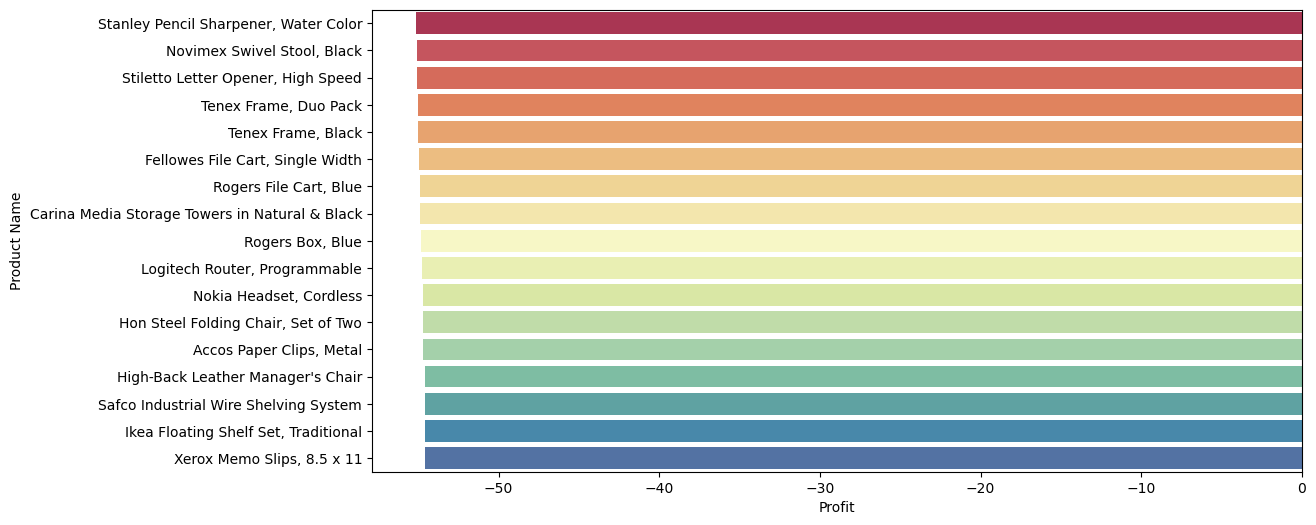

In [360]:
plt.subplots(figsize=(12,6))
sns.barplot(x="Profit", y="Product Name" , data= df.sort_values("Profit",ascending=True).head(20),palette='Spectral',linewidth=3)

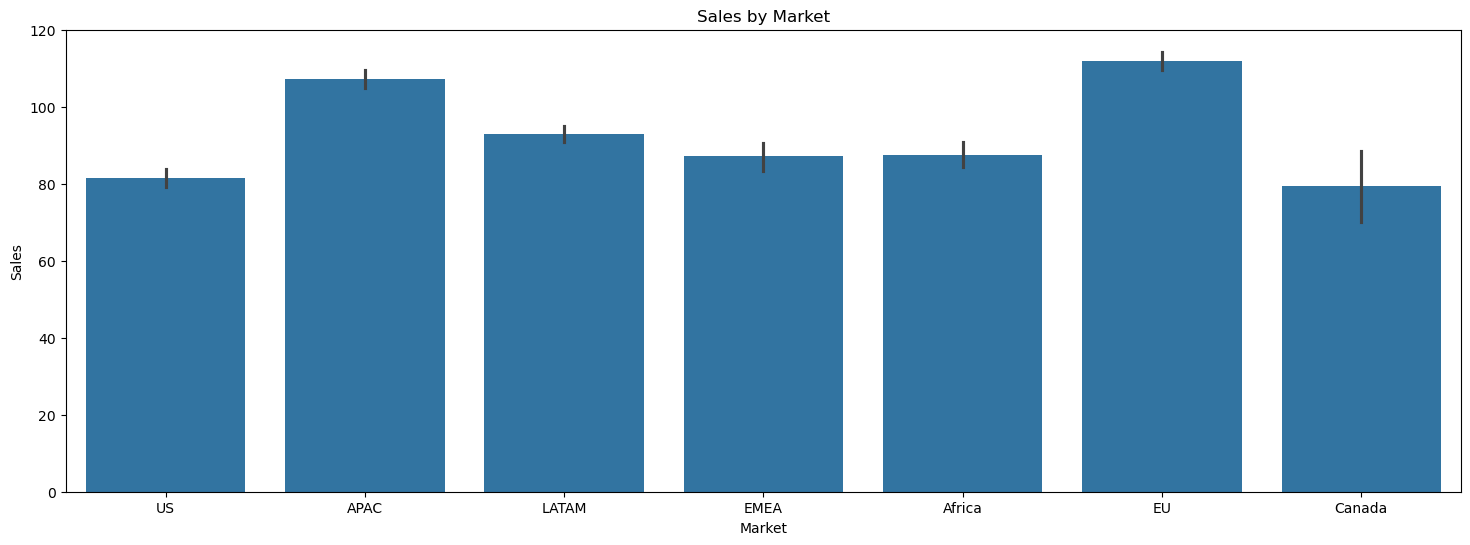

In [361]:
# Bar Plot of sales by different markets
plt.figure(figsize=(18, 6))
sns.barplot(x='Market', y='Sales', data=df)
plt.title('Sales by Market')
plt.show()


The company's performance is strongest in the EU and APAC market.
There is potential for sales growth in the US and Canadian markets.
The company has a relatively stable sales performance across the Africa, LATAM, EMEA.

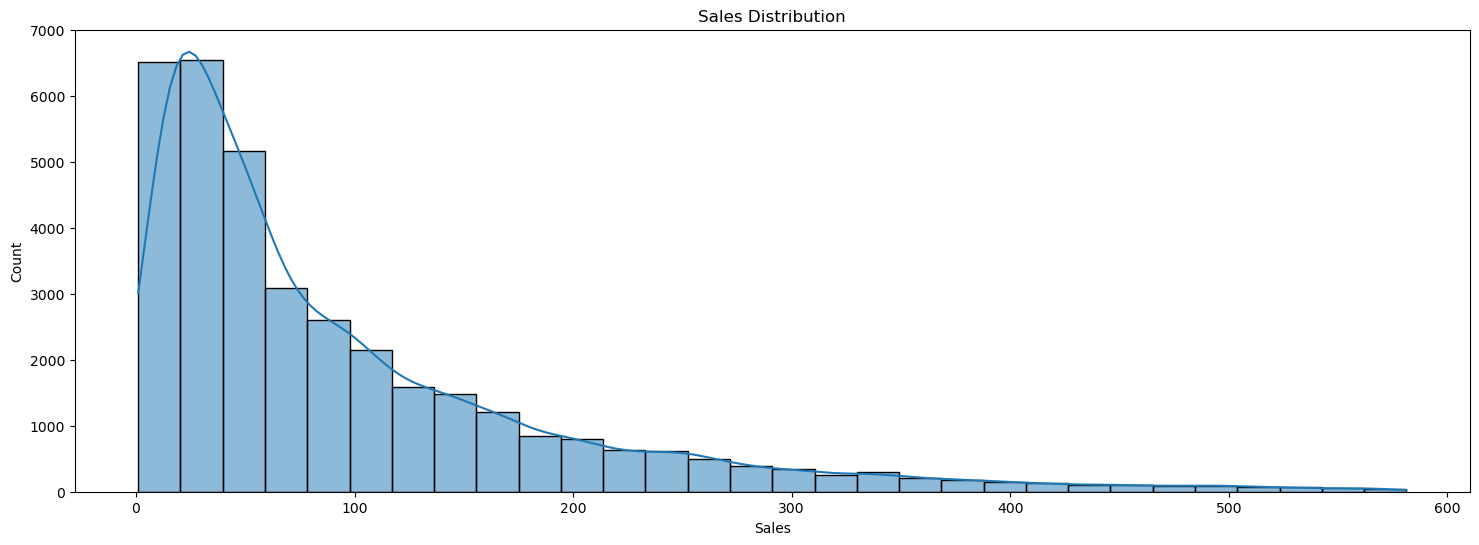

In [365]:
# Histogram of sales distribution
plt.figure(figsize=(18, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()



It can be observed that majority of the sales transactions are low and very few of them have high selling values.
It means this right-skewed distribution shows that even though low amounts of sales are frequent, larger ones are not common.
This type of distribution is very common for sales data, where small transactions prevail over large ones.

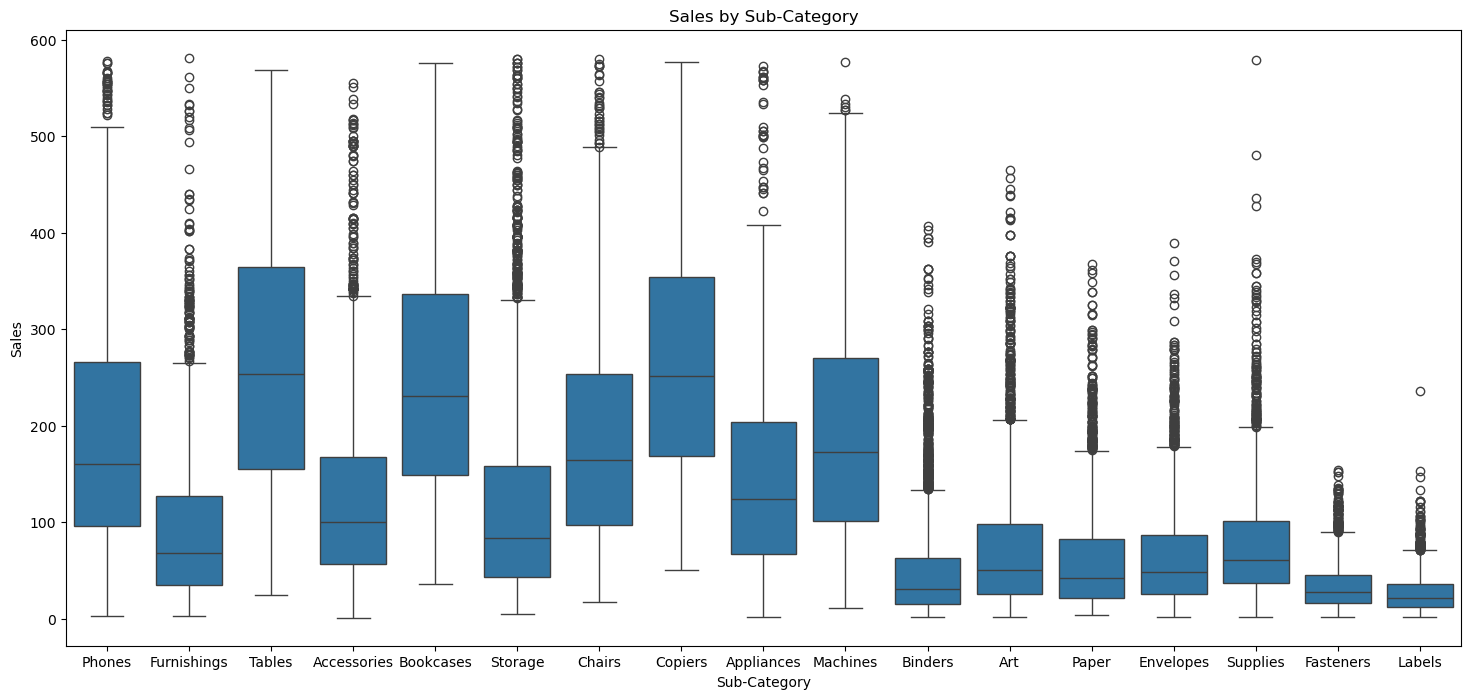

In [367]:
# Box Plot
plt.figure(figsize=(18, 8))
sns.boxplot(x='Sub-Category', y='Sales', data=df)
plt.title('Sales by Sub-Category')
plt.show()



Phones: The distribution of sale  is quite high, with a median of about 200 and a lot of outliers going beyond the 500 mark.
Furnishings: sales are lower, about 100, with a wide spread of data but many outliers.
Tables: The sales are far more concentrated, have a medium close to 200, and contain many high outliers.
Accessories, Bookcases, Storage, Chairs, Copiers, Appliances: With the exception of two or three categories, most of these categories yield a pattern much like the scatter plot above. They all have medians that vary between 100 to 200, are very volatile in the sale's values, and show an abundance of outliers.
Binders, Art, Paper, Envelopes, Supplies, Fasteners, Labels: On average, the sales are in lower numbers at under 100. Also, the spread of the sales is narrower with many outliers.

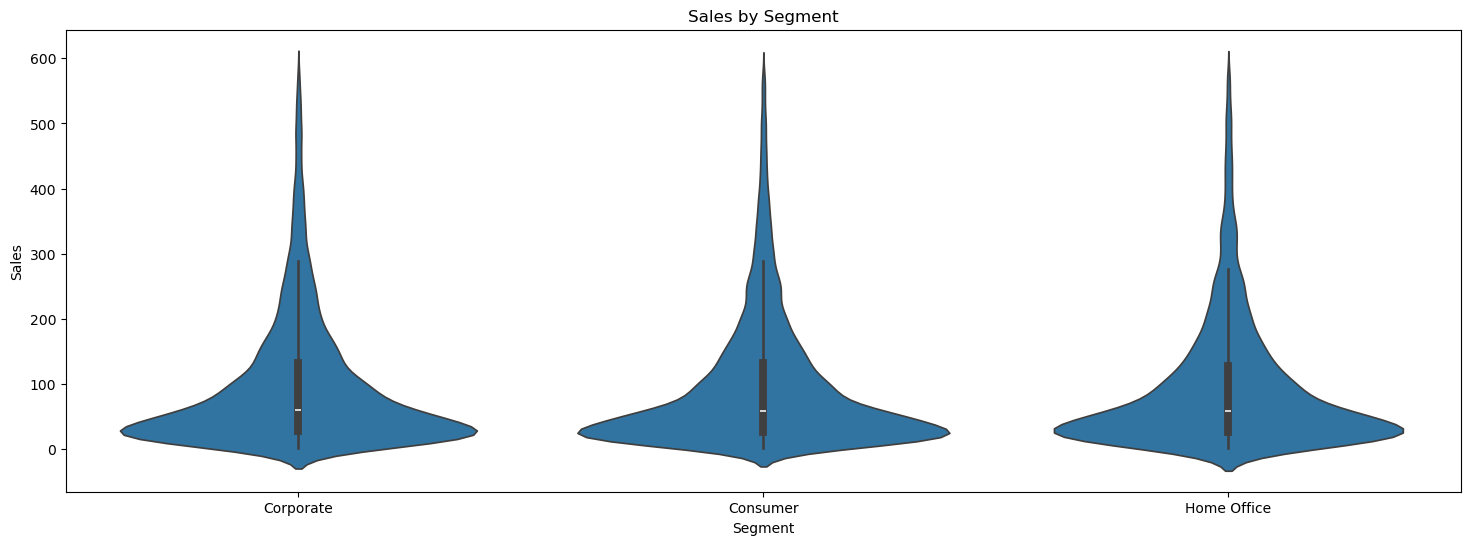

In [370]:
# Violin Plot for sales by segment
plt.figure(figsize=(18, 6))
sns.violinplot(x='Segment', y='Sales', data=df)
plt.title('Sales by Segment')
plt.show()

In [371]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
5909,31907,CA-2013-161816,4/29/2013,5/2/2013,First Class,NB-18655,Nona Balk,Corporate,Dallas,Texas,...,TEC-PH-10003012,Technology,Phones,Nortel Meridian M3904 Professional Digital phone,369.576,3.0,0.2,41.5773,57.20,Medium
5914,24261,ID-2013-79432,12/11/2013,12/14/2013,Second Class,JK-15325,Jason Klamczynski,Corporate,Adelaide,South Australia,...,FUR-FU-10001477,Furniture,Furnishings,"Rubbermaid Stacking Tray, Black",158.760,7.0,0.1,21.0000,57.12,Critical
5915,33355,CA-2014-120376,12/23/2014,12/26/2014,First Class,TP-21130,Theone Pippenger,Consumer,Detroit,Michigan,...,FUR-TA-10004534,Furniture,Tables,Bevis 44 x 96 Conference Tables,411.800,2.0,0.0,70.0060,57.12,High
5921,24245,IN-2014-22606,8/11/2014,8/11/2014,Same Day,RC-19960,Ryan Crowe,Consumer,Wenzhou,Zhejiang,...,TEC-AC-10000861,Technology,Accessories,"SanDisk Router, Erganomic",254.160,1.0,0.0,40.6500,57.07,Medium
5922,30952,ID-2014-85529,5/8/2014,5/12/2014,Standard Class,AG-10300,Aleksandra Gannaway,Corporate,Auckland,Auckland,...,FUR-BO-10001872,Furniture,Bookcases,"Bush Stackable Bookrack, Pine",449.496,6.0,0.4,-30.0240,57.05,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,24175,IN-2014-57662,8/5/2014,8/10/2014,Standard Class,DB-13270,Deborah Brumfield,Home Office,Townsville,Queensland,...,OFF-BI-10002424,Office Supplies,Binders,"Avery Binder, Economy",58.050,5.0,0.1,19.9500,0.01,Medium
51285,29002,IN-2014-62366,6/19/2014,6/19/2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5.0,0.0,4.5000,0.01,Medium
51287,40470,US-2013-155768,12/2/2013,12/2/2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3.0,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,2/18/2012,2/22/2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,S‹o Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2.0,0.0,2.4000,0.00,Medium


In [372]:
# Check for null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

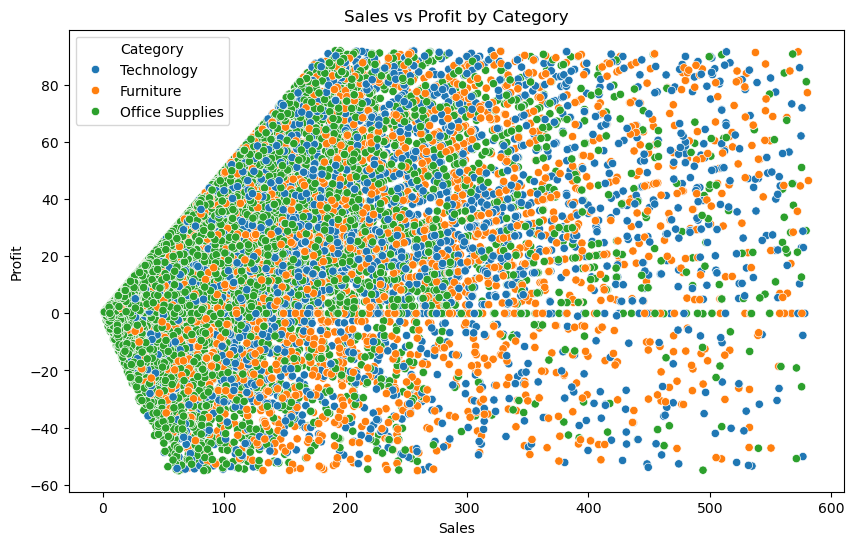

In [373]:
# Scatter Plot of sales vs profit by category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category')
plt.title('Sales vs Profit by Category')
plt.show()


Technology(blue): The sales and profit both are very spread out with some of those being high profit and negative profit.
Furnitur(orange)s:Ssimilar to Technology, but seems to havh more significant presence in the negative profit area, particularly between -20 to -40.
Office Supplies (Green Dots)H have the largest spread along the sales axis but also a wide dispersion in profit, including a large part of it in the negative range.
The graph sh that is a lot of variation in profit over all categories at all levels of sales, and no consistent trend that higher sales result in higher profit. A lot of negative profits are shown, mainly in the Furniture and Office Supplies categories.

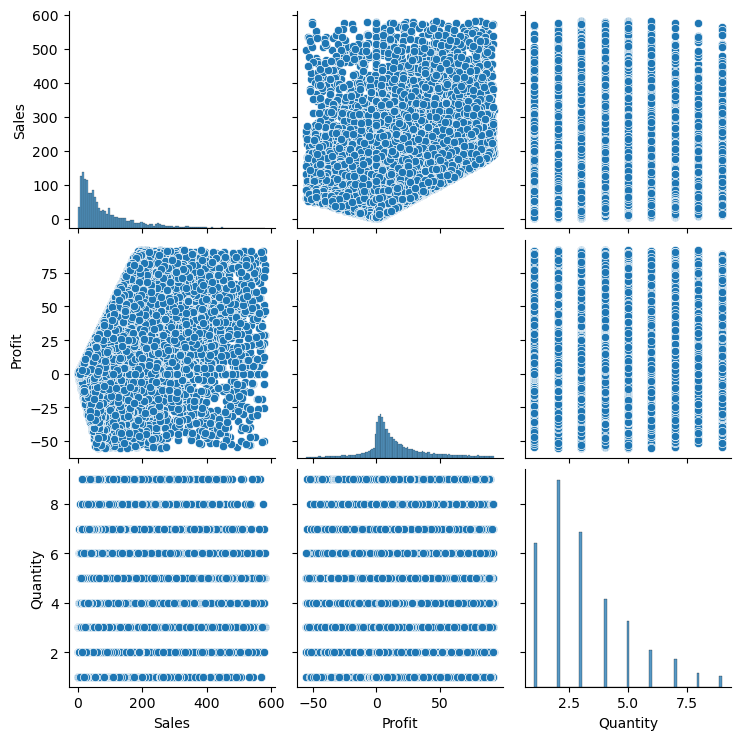

In [375]:
# Pair Plot
sns.pairplot(df[['Sales', 'Profit', 'Market', 'Quantity']])
plt.show()

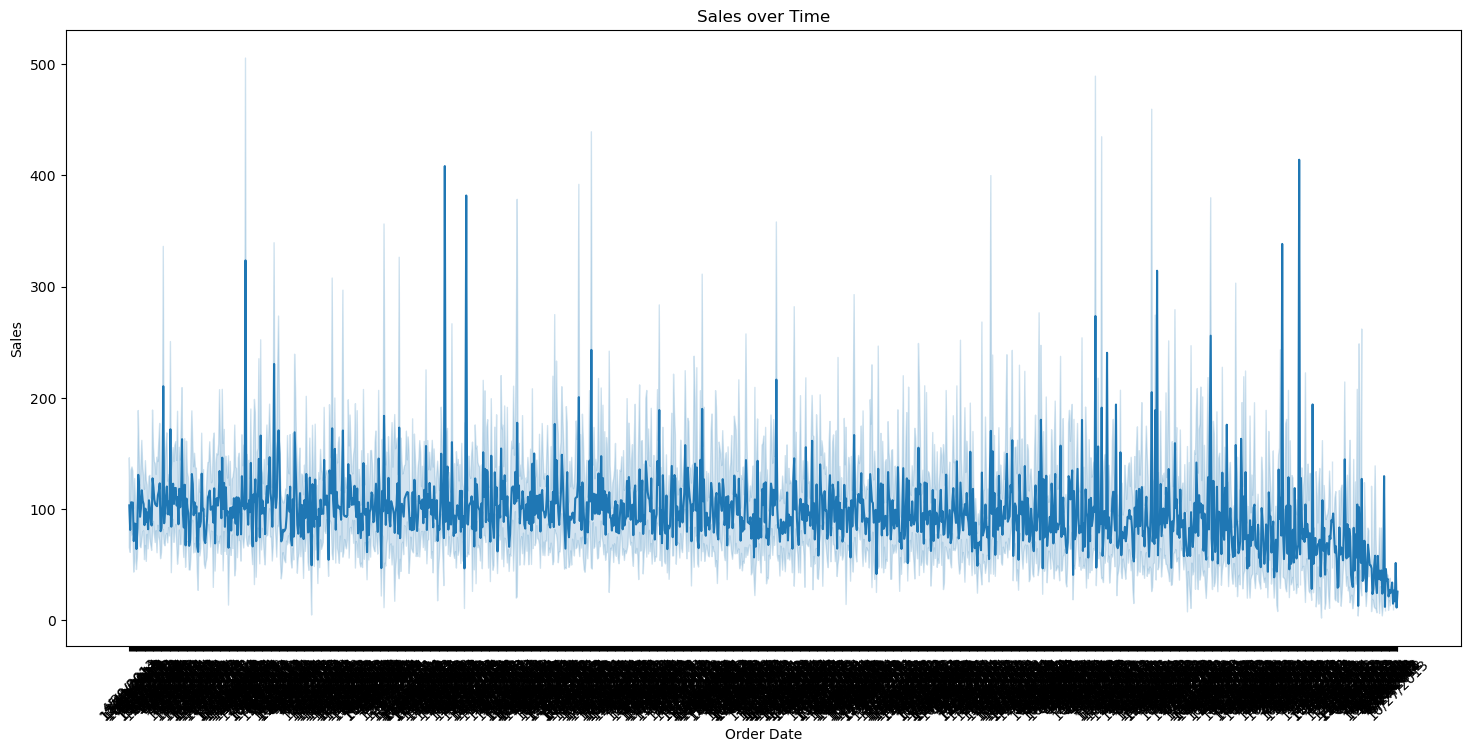

In [376]:
# Line Plot of sales over time
plt.figure(figsize=(18, 8))
sns.lineplot(x='Order Date', y='Sales', data=df)
plt.title('Sales over Time')
plt.xticks(rotation=45)
plt.show()

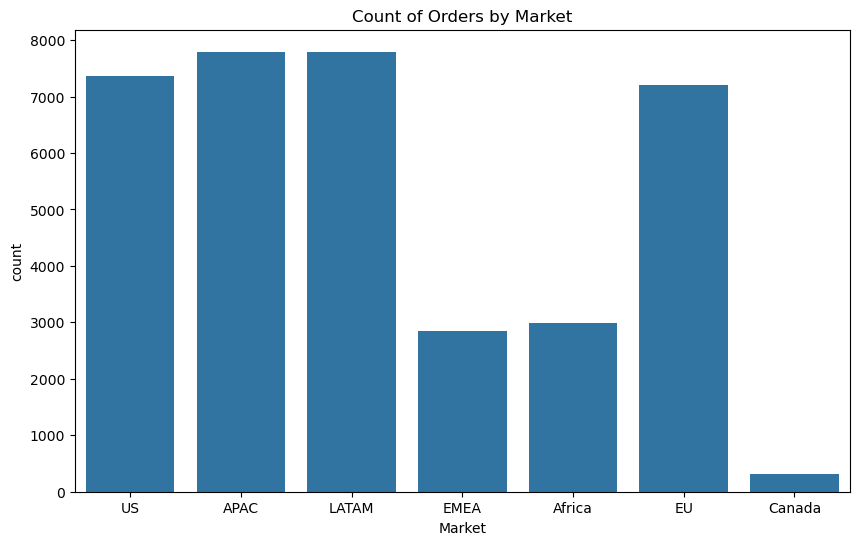

In [377]:
# Count Plot of orders by market
plt.figure(figsize=(10, 6))
sns.countplot(x='Market', data=df)
plt.title('Count of Orders by Market')
plt.show()

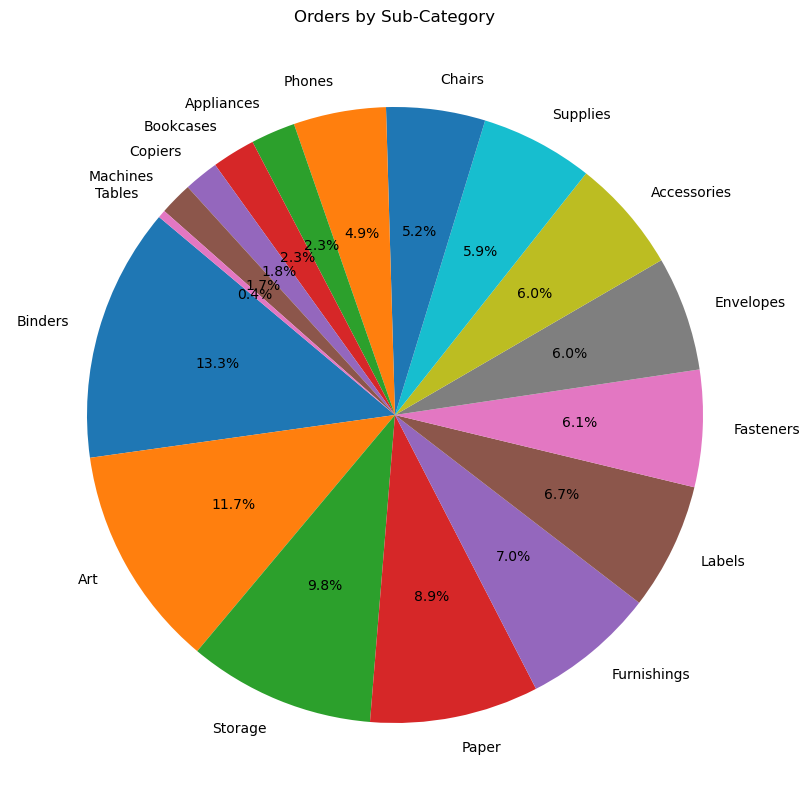

In [378]:
# Pie Chart of orders by sub category
category_counts = df['Sub-Category'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Orders by Sub-Category')
plt.show()


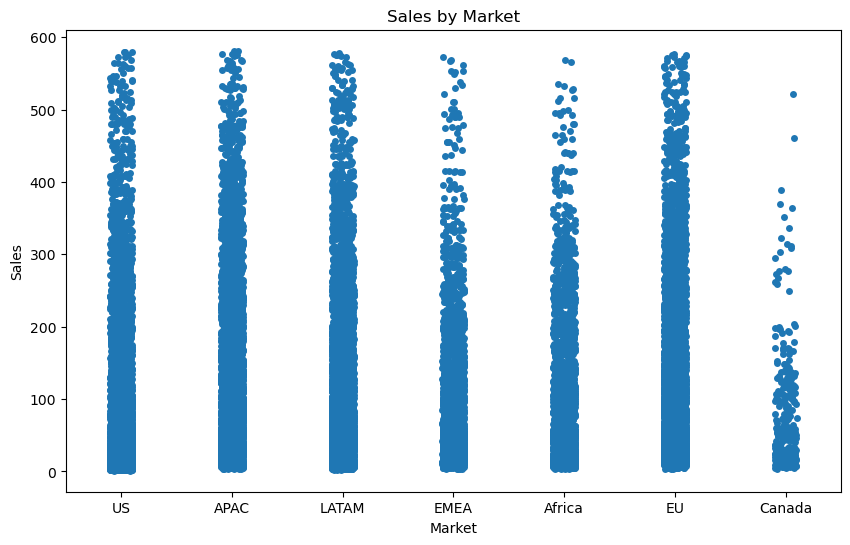

In [380]:
# Strip Plot of sales over time
plt.figure(figsize=(10, 6))
sns.stripplot(x='Market', y='Sales', data=df, jitter=True)
plt.title('Sales by Market')
plt.show()

In [ ]:
# Time Series Plot of Sales (if 'Order Date' column exists and is in datetime format)
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Order Date', y='Sales', data=df)
    plt.title('Sales over Time')
    plt.xticks(rotation=45)
    plt.show()